In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tbx-11/TBX11K/TBX11K_CVPR2020.pdf
/kaggle/input/tbx-11/TBX11K/README.md
/kaggle/input/tbx-11/TBX11K/teaser.jpg
/kaggle/input/tbx-11/TBX11K/code/make_json_anno.py
/kaggle/input/tbx-11/TBX11K/code/make_json_anno.sh
/kaggle/input/tbx-11/TBX11K/code/pycococreatortools.py
/kaggle/input/tbx-11/TBX11K/annotations/xml/tb0750.xml
/kaggle/input/tbx-11/TBX11K/annotations/xml/tb0500.xml
/kaggle/input/tbx-11/TBX11K/annotations/xml/tb0532.xml
/kaggle/input/tbx-11/TBX11K/annotations/xml/tb1104.xml
/kaggle/input/tbx-11/TBX11K/annotations/xml/tb1113.xml
/kaggle/input/tbx-11/TBX11K/annotations/xml/tb1180.xml
/kaggle/input/tbx-11/TBX11K/annotations/xml/tb1012.xml
/kaggle/input/tbx-11/TBX11K/annotations/xml/tb0548.xml
/kaggle/input/tbx-11/TBX11K/annotations/xml/tb0317.xml
/kaggle/input/tbx-11/TBX11K/annotations/xml/tb0832.xml
/kaggle/input/tbx-11/TBX11K/annotations/xml/tb1080.xml
/kaggle/input/tbx-11/TBX11K/annotations/xml/tb0953.xml
/kaggle/input/tbx-11/TBX11K/annotations/xml/tb0903.xml
/ka

In [ ]:
!pip uninstall opencv-python -y
!pip uninstall opencv-contrib-python -y

In [ ]:
!pip install opencv-python
!pip install opencv-contrib-python

In [3]:
! cp -R /kaggle/input/tbx-11/* /kaggle/working

In [4]:
import numpy as np 
import pandas as pd
#import tensorflow as tf
import os
import matplotlib.pyplot as plt
import time
import glob
import random
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import imshow
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.optimizers import Adam
import os
import cv2
import shutil
import lxml
import xml.etree.ElementTree as ET
from PIL import Image, ImageDraw, ImageEnhance
import albumentations as albu

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
#import tensorflow as tf

import keras7
keras.__version__

ModuleNotFoundError: No module named 'keras7'

In [ ]:
#print(tf.__version__)

In [ ]:
!pip uninstall tensorflow --yes

In [ ]:
#!pip install tensorflow==2.10.0

!pip install tensorflow==2.9.1

In [ ]:
!pip3 show tensorflow

In [ ]:
import tensorflow as tf
#print(tf.__version__)

In [ ]:
#!tensorflow_version 2.10
#import tensorflow as tf
print(tf.__version__)

In [ ]:
#!pip install tensorflow==2.10 as tf
#import tensorflow as tf
print(tf.__version__)

In [ ]:
# if tensorflow error ----

!pip uninstall tensorflow-io --yes
!pip install tensorflow-gpu
!pip install --no-deps tensorflow-io

In [7]:
%cd /kaggle/working/TBX11K/imgs

/kaggle/working/TBX11K/imgs


In [5]:
#%cd /kaggle/working/TBX11K/imgs

/kaggle/working/TBX11K/imgs


In [ ]:
##shutil.rmtree(r'/kaggle/working/tbx-11/TBX11K/imgs/train')

In [ ]:
!ls

In [13]:
%cd ..

/kaggle/working/tbx-11/TBX11K/imgs


In [6]:
#%cd /kaggle/working/tbx-11/TBX11K/imgs
#!ls

[Errno 2] No such file or directory: '/kaggle/working/tbx-11/TBX11K/imgs'
/kaggle/working


In [8]:
%mkdir train

In [9]:
!pwd

/kaggle/working/TBX11K/imgs


In [9]:
%cd train
%mkdir health
%mkdir sick
%mkdir tb

/kaggle/working/TBX11K/imgs/train


In [17]:
!ls

health	sick  tb


In [10]:
! cp -R /kaggle/working/TBX11K/imgs/health/* /kaggle/working/TBX11K/imgs/train/health
! cp -R /kaggle/working/TBX11K/imgs/tb/* /kaggle/working/TBX11K/imgs/train/tb
! cp -R /kaggle/working/TBX11K/imgs/sick/* /kaggle/working/TBX11K/imgs/train/sick

In [31]:
import shutil
shutil.rmtree('/kaggle/working/443-train-images/')



In [ ]:
#! cp -R /kaggle/input/tbx-11/TBX11K/imgs/health/* /kaggle/working/train/health
#! cp -R /kaggle/input/tbx-11/TBX11K/imgs/tb/* /kaggle/working/train/tb
#! cp -R /kaggle/input/tbx-11/TBX11K/imgs/sick/* /kaggle/working/train/sick

In [11]:
import os

lst = os.listdir('/kaggle/working/TBX11K/imgs/train/health/') # your directory path
number_files = len(lst)
print(number_files)

3800


In [12]:
import os

lst = os.listdir('/kaggle/working/TBX11K/imgs/train/tb/') # your directory path
number_files = len(lst)
print(number_files)

800


In [13]:
import os

lst = os.listdir('/kaggle/working/TBX11K/imgs/train/sick/') # your directory path
number_files = len(lst)
print(number_files)

3800


In [ ]:
#file_count = 800
#samples = []
#for category in df['labels'].unique():    
    #category_slice = df.query("labels == @category")
    #samples.append(category_slice.sample(file_count, replace=False,random_state=1))
#df = pd.concat(samples, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)
#print (df['labels'].value_counts())
#print (len(df))

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [ ]:
## CODE NOT RUN 17/7
plt.figure(figsize=(14,10))
for i in range(20):
    random = np.random.randint(1,len(df))
    plt.subplot(4,5,i+1)
    img = df.loc[random,"file_paths"]
    plt.imshow(plt.imread(img))
    plt.title(df.loc[random, "labels"], size = 10, color = "black") 
    plt.xticks([])
    plt.yticks([])

    
plt.show()


# DATA LOAD - JSON / COCO TO CSV 

In [ ]:
#!pip install cython
#!pip install pycocotools

In [ ]:
#!pip install git+https://github.com/waspinator/pycococreator.git@0.2.0
#!pip install git+https://github.com/waspinator/coco.git@2.1.0

In [ ]:
#!pip install git+git://github.com/waspinator/coco.git@2.1.0

In [ ]:
#!sh code/make_json_anno.sh

# Tried the given sh and py but this is not working

In [ ]:
#  This code from https://www.aitude.com/annotation-converters-for-object-detection/
#is used to convert the json to csv in the annotations/json folder.


In [ ]:
#classes = []
sdict = {'123' :"tbxfile" , '1234' : "newfile" }
#for cl in s:
        #classes.append(cl['name'])
        #classes.append(cl['id'])
image_id = '1234'
values = list(sdict.keys())
print(values)
index = values.index(image_id)
print(index)
# Get the key from the dictionary using the index
result = list(sdict.values())[index]
print(result)

In [ ]:
url = 'tb/tb0004.png'
final_url = url.rsplit('/', 1)

print (final_url)
#Output : ['https://devnote.in/project/test', 'index.html']

print (final_url[0])
print (url.rsplit('/', 1)[1])
#Output : test.html

In [15]:
%cd /kaggle/working/TBX11K/annotations/json

/kaggle/working/TBX11K/annotations/json


In [ ]:
!ls

In [ ]:
#import os
#os.remove("/kaggle/working/tbx-11/TBX11K/annotations/json/all_trainval.csv")

# CONVERT DATA FROM JSON to CSV ..WORKING CODE

In [17]:
def convert_coco_json_to_csv(filename):
    import pandas as pd
    import json
    
    # COCO2017/annotations/instances_val2017.json
    s = json.load(open(filename, 'r'))
    out_file = filename[:-5] + '.csv'
    out = open(out_file, 'w')
    out.write('id,x1,y1,x2,y2,class_name,boxwidth,boxheight, imagewidth, imageheight, file_name\n')

    dictclass = {}
    for cat in s['categories']:
        catKey = cat['id']
        catValue = cat['name']
        dictclass.update({catKey:catValue}) 
    
    
    sdict = {} 
    all_ids = []
    for im in s['images']:
        all_ids.append(im['id'])
        aKey = im['id']
        aValue = im['file_name']
        sdict.update({aKey:aValue})
        
        #imagefile = im['file_name']
        #classlabel = imagefile.rsplit('/', 1)[0]

    all_ids_ann = []
    for ann in s['annotations']:
        image_id = ann['image_id']
        all_ids_ann.append(image_id)
        x1 = ann['bbox'][0]
        x2 = ann['bbox'][0] + ann['bbox'][2]
        y1 = ann['bbox'][1]
        y2 = ann['bbox'][1] + ann['bbox'][3]
        
        boxwidth = ann['bbox'][2]
        boxheight = ann['bbox'][3]
        classid = ann['category_id']
        imagewidth = ann['width']
        imageheight = ann['height']
        
        # Find the index of the value in the list for id and filename
        values = list(sdict.keys())
        index = values.index(image_id)
        # Get the key from the dictionary using the index
        fname = list(sdict.values())[index]
          
    
        # GET Class name from class dictionary for each annotation
        classname = list(dictclass.keys())
        indexclass = values.index(classid)
        # Get the key from the dictionary using the index
        classname = list(dictclass.values())[indexclass] 
    
        out.write('{},{},{},{},{},{},{},{},{},{},{}\n'.format(image_id, x1, y1, x2, y2, classname,boxwidth,boxheight, imagewidth, imageheight, fname))

    all_ids = set(all_ids)
    all_ids_ann = set(all_ids_ann)
    no_annotations = list(all_ids - all_ids_ann)
    # Output images without any annotations
    for image_id in no_annotations:
        #print(no_annotations)
        # get the filename from id and filename dictionary
        values = list(sdict.keys())
        index = values.index(image_id)
        #print(index)
        # Get the key from the dictionary using the index
        imagefilename = list(sdict.values())[index]
        
        # Get Class label by splitting the filename
        classlabel = imagefilename.rsplit('/', 1)[0]
         
        out.write('{},{},{},{},{},{},{},{},{},{},{}\n'.format(image_id, -1, -1, -1, -1, classlabel , -1 , -1,-1, -1, imagefilename))
    out.close()

    # Sort file by image id
    s1 = pd.read_csv(out_file)
    s1.sort_values('id', inplace=True)
    s1.to_csv(out_file, index=False)

In [ ]:
#import os
#os.remove("/kaggle/working/tbx-11/TBX11K/annotations/json/all_trainval.csv")

## Generate csv files

In [21]:
convert_coco_json_to_csv('/kaggle/working/TBX11K/annotations/json/all_trainval.json')

In [19]:
convert_coco_json_to_csv('/kaggle/working/TBX11K/annotations/json/all_train.json')

In [22]:
convert_coco_json_to_csv('/kaggle/working/TBX11K/annotations/json/all_val.json')


In [ ]:

convert_coco_json_to_csv('/kaggle/working/tbx-11/TBX11K/annotations/json/TBX11K_train_only_tb.json')


In [ ]:
convert_coco_json_to_csv('/kaggle/working/tbx-11/TBX11K/annotations/json/TBX11K_trainval.json')

In [ ]:
convert_coco_json_to_csv('/kaggle/working/tbx-11/TBX11K/annotations/json/TBX11K_trainval_only_tb.json')

In [ ]:
convert_coco_json_to_csv('/kaggle/working/tbx-11/TBX11K/annotations/json/TBX11K_train.json')

In [25]:
convert_coco_json_to_csv('/kaggle/working/TBX11K/annotations/json/all_test.json')

In [ ]:
%cd /kaggle/working/tbx-11/TBX11K/annotations/json
!ls

In [ ]:
# TEST FILE WILL NOT BE GENERATED 

#import os
#os.remove("/kaggle/working/tbx-11/TBX11K/annotations/json/all_test.csv") 

In [ ]:
# Load the image

path ='/kaggle/working/tbx-11/TBX11K/' + 'imgs/train/tb/' + 'tb0026.png'

image = plt.imread(path)

print(image.shape)

# Make the image larger
plt.figure(figsize=(5,5))

plt.imshow(image)
plt.show()

In [ ]:
# for each bbox
#for i in range(0, len(df)):
import cv2  
path ='/kaggle/working/tbx-11/TBX11K/' + 'imgs/train/tb/' + 'tb0021.png'

image = plt.imread(path)
#bbox_dict = df.loc[i, 'bbox']

# Convert from type str tp type dict
#bbox_dict = ast.literal_eval(bbox_dict)

# Round each value up and convert it to an integer
#xmin = int(round(bbox_dict['xmin']))
#ymin = int(round(bbox_dict['ymin']))
#height = int(round(bbox_dict['height']))
#width = int(round(bbox_dict['width']))

xmin = 308
ymin = 64
xmax = 461
ymax = 253

#[[308.88, 64.84, 461.2, 253.73], [389.84, 276.78, 460.03, 325.39]]

#xmax = xmin + width
#ymax = ymin + height

# Draw the bbox on the image
start_point = (xmin, ymin) 
end_point = (xmax, ymax) 
bbox_color = (255, 255, 0) 
bbox_thickness = 3

# Draw the bbox on the image
image = cv2.rectangle(image, start_point, end_point, bbox_color, bbox_thickness)

# Display a large image
plt.figure(figsize=(5,5))

plt.imshow(image)
plt.show()

In [ ]:
img = 
image = cv2.imread(img) 

plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
### CODE NOT USED #################################################

In [ ]:
import cv2

#img = cv2.imread('/kaggle/working/tbx-11/TBX11K/imgs/train/tb/tb1196.png') 
img = cv2.imread('/kaggle/working/tbx-11/TBX11K/imgs/train/tb/tb0021.png') 
predictions = {'predictions': [{'x': 389, 'y': 276, 'width': 460, 'height': 325, 'confidence': 0.7369905710220337, 'class': 'Paper', 'image_path': 'example.jpg', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': 512, 'height': 512}}

for bounding_box in predictions["predictions"]:
    #x0 = bounding_box['x'] - bounding_box['width'] / 2
    #x1 = bounding_box['x'] + bounding_box['width'] / 2
    #y0 = bounding_box['y'] - bounding_box['height'] / 2
    #y1 = bounding_box['y'] + bounding_box['height'] / 2
    
    x0 = 389
    y0 = 276
    x1 = 460
    y1 = 325
         
    
    start_point = (int(x0), int(y0))
    end_point = (int(x1), int(y1))
    image = cv2.rectangle(img, start_point, end_point, color=(0,255,0), thickness=2)
   
cv2.imwrite("example_with_bounding_boxes.jpg", image)

plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
import cv2

#img = cv2.imread('/kaggle/working/tbx-11/TBX11K/imgs/train/tb/tb1196.png') 
img = cv2.imread('/kaggle/working/tbx-11/TBX11K/imgs/train/tb/tb0021.png') 
predictions = {'predictions': [{'x': 389, 'y': 276, 'width': 460, 'height': 325, 'confidence': 0.7369905710220337, 'class': 'Paper', 'image_path': 'example.jpg', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': 512, 'height': 512}}

for bounding_box in predictions["predictions"]:
    #x0 = bounding_box['x'] - bounding_box['width'] / 2
    #x1 = bounding_box['x'] + bounding_box['width'] / 2
    #y0 = bounding_box['y'] - bounding_box['height'] / 2
    #y1 = bounding_box['y'] + bounding_box['height'] / 2
    
    x0 = 400
    y0 = 88
    x1 = 518
    y1 = 345
         
    
    start_point = (int(x0), int(y0))
    end_point = (int(x1), int(y1))
    image = cv2.rectangle(img, start_point, end_point, color=(0,255,0), thickness=2)
   
cv2.imwrite("example_with_bounding_boxes.jpg", image)

plt.imshow(image)
plt.axis('off')
plt.show()

#518.9184	88.1824	774.8160	345.0728

In [ ]:
#!pip uninstall opencv-contrib-python

#!pip uninstall opencv-python-headless --y

In [ ]:
#!pip install opencv-python

In [ ]:
#!pip install opencv-contrib-python

In [ ]:
#import cv2
#print(cv2.getBuildInformation())

In [ ]:
#!pip uninstall opencv-python-headless -y 

#!pip install opencv-python --upgrade

In [ ]:
#!pip list | grep opencv

In [ ]:
#!pip install opencv-python-headless==4.5.3.56 
#!pip install opencv-contrib-python==4.5.3.56
#!pip install opencv-python==4.5.3.56

In [ ]:
import cv2
import numpy as np


def drawBox(boxes, image):
    for i in range(0, len(boxes)):
        # changed color and width to make it visible
        cv2.rectangle(image, (boxes[i][2], boxes[i][3]), (boxes[i][4], boxes[i][5]), (255, 0, 0), 1)
    #cvDestroyWindow("ShowImage");
    cv2.imshow("img", image)
    cv2.waitKey(0)
    #cvDestroyWindow("ShowImage");
    cv2.destroyAllWindows()


def cvTest():
    # imageToPredict = cv2.imread("img.jpg", 3)
    imageToPredict = cv2.imread("/kaggle/working/tbx-11/TBX11K/imgs/train/tb/tb0021.png", 3)
    print(imageToPredict.shape)

    # Note: flipped comparing to your original code!
    # x_ = imageToPredict.shape[0]
    # y_ = imageToPredict.shape[1]
    y_ = imageToPredict.shape[0]
    x_ = imageToPredict.shape[1]

    targetSize = 256
    x_scale = targetSize / x_
    y_scale = targetSize / y_
    print(x_scale, y_scale)
    img = cv2.resize(imageToPredict, (targetSize, targetSize));
    print(img.shape)
    img = np.array(img);

    # original frame as named values
    (origLeft, origTop, origRight, origBottom) = (308, 64, 461, 253)

    x = int(np.round(origLeft * x_scale))
    y = int(np.round(origTop * y_scale))
    xmax = int(np.round(origRight * x_scale))
    ymax = int(np.round(origBottom * y_scale))
    # Box.drawBox([[1, 0, x, y, xmax, ymax]], img)
    drawBox([[1, 0, x, y, xmax, ymax]], img)


cvTest()

In [ ]:
!sudo aptitude search libgtk2.0-dev

**#### LOAD TRAINING DATA USING Directories ****** NOT REQUIRED NOW 

In [ ]:

#dirlist = ['/kaggle/input/tbx-11/TBX11K/imgs/health', '/kaggle/input/tbx-11/TBX11K/imgs/sick', '/kaggle/input/tbx-11/TBX11K/imgs/tb']
#dirlist = ['/kaggle/working/tbx-11/TBX11K/imgs/health', '/kaggle/working/tbx-11/TBX11K/imgs/sick', '/kaggle/working/tbx-11/TBX11K/imgs/tb']

# Changed
dirlist = ['/kaggle/working/tbx-11/TBX11K/imgs/train/health', '/kaggle/working/tbx-11/TBX11K/imgs/train/sick', '/kaggle/working/tbx-11/TBX11K/imgs/train/tb']
classes = ['Healthy', 'Sick', 'Tuberculosis']
filepaths = []
labels = []
for d, c in zip(dirlist, classes):
    flist = os.listdir(d)
    for f in flist:
        fpath = os.path.join(d, f)
        filepaths.append(fpath)
        labels.append(c)
print ('filepaths: ', len(filepaths), '   labels: ', len(labels))

In [ ]:
Fseries=pd.Series(filepaths, name='file_paths')
Lseries=pd.Series(labels, name='labels')
df_trainDIR=pd.concat([Fseries,Lseries], axis=1)
df_trainDIR=pd.DataFrame(np.array(df_trainDIR).reshape(8400,2), columns = ['file_paths', 'labels'])
print(df_trainDIR['labels'].value_counts())

In [ ]:
df_trainDIR

In [ ]:
import pathlib

#data_dir = "/kaggle/input/tbx-11/TBX11K/imgs/" # Datasets path
data_dir = "/kaggle/working/tbx-11/TBX11K/imgs/train" # Datasets path
data_dir = pathlib.Path(data_dir)
data_dir

healthy = list(data_dir.glob('health/*'))
tb = list(data_dir.glob('tb/*'))
sick = list(data_dir.glob('sick/*'))
print("Length of normal: ", len(healthy))
print("Length of tb: ", len(tb))
print("Length of sick: ", len(sick))

In [ ]:
!pwd

In [ ]:
################## Above code Not required 

# **#### LOAD TRAINING DATA USING JSON FILES in annotations/json folder**

In [ ]:
#df_alltrainval = pd.read_csv('all_trainval.csv',names=['class_name', 'x_min','y_min', 'x_max', 'y_max','image_id' ,'img_height','img_width'])

In [23]:
!pwd

/kaggle/working/TBX11K/annotations/json


In [26]:

df_alltrain = pd.read_csv('all_train.csv')
df_alltrainval = pd.read_csv('all_trainval.csv')
df_allval = pd.read_csv('all_val.csv')
df_alltest = pd.read_csv('all_test.csv')



#### NOTE _ TEST NOT LOADING ...csv is 0 bytes

In [27]:
df_alltrain.head()

,id,x1,y1,x2,y2,class_name,boxwidth,boxheight,imagewidth,imageheight,file_name
0,1,381.833710,126.873390,422.070618,171.439163,ActiveTuberculosis,40.236908,44.565773,512,512,tb/tb0005.png
1,2,307.307343,62.050446,442.811035,208.661728,ObsoletePulmonaryTuberculosis,135.503693,146.611282,512,512,tb/tb0007.png
2,2,144.120087,52.934719,270.298798,169.160229,ObsoletePulmonaryTuberculosis,126.178711,116.225510,512,512,tb/tb0007.png
3,3,307.451935,81.311111,451.640808,265.488892,ActiveTuberculosis,144.188873,184.177780,512,512,tb/tb0012.png
4,4,138.103104,119.276955,173.297867,150.169144,ObsoletePulmonaryTuberculosis,35.194763,30.892189,512,512,tb/tb0017.png


In [ ]:
# Load TBX TRAIN
df_tbxtrain = pd.read_csv('TBX11K_train.csv')

df_tbxtrainonlyTB = pd.read_csv('TBX11K_train_only_tb.csv')


# Load TBX VAL

df_tbxtrainval = pd.read_csv('TBX11K_trainval.csv')

df_tbxtrainvalonlyTB = pd.read_csv('TBX11K_trainval_only_tb.csv')



In [ ]:
df_alltrain.info()

In [ ]:
df_alltrain.count()  #--7191

#df_alltrainval.count()  #--9388

#df_allval.count()  # 2197


#df_tbxtrain.count()  -- 7806   #Active , Obsol

#df_tbxtrainonlyTB.count() --1744  # Active, Obsol

#df_tbxtrainval.count()  --10024  # Obsol, Active

#df_tbxtrainvalonlyTB.count() --2401  #Obsol, Active

In [ ]:
df_alltrain.head()

In [ ]:
df_alltrain.class_name.value_counts()

In [ ]:
df_alltrain.class_name.nunique()

In [29]:
df_alltrain_backup = df_alltrain
df_alltrainval_backup = df_alltrainval
df_allval_backup = df_allval
df_alltest = df_alltest

In [30]:
df_alltrain_backup.count()

id              7191
x1              7191
y1              7191
x2              7191
y2              7191
class_name      7191
boxwidth        7191
boxheight       7191
 imagewidth     7191
 imageheight    7191
 file_name      7191
dtype: int64

# Train dataframe processing

In [31]:

df_alltrain = df_alltrain[df_alltrain.class_name != 'extra/da+db/train']

In [32]:
df_alltrain.class_name.nunique()

6

In [33]:
df_alltrain = df_alltrain[df_alltrain.class_name != 'extra/mc+shenzhen/train']

In [36]:
df_alltrain = df_alltrain[df_alltrain.class_name != 'tb']

In [35]:
 df_alltrain[df_alltrain.class_name == 'tb']

,id,x1,y1,x2,y2,class_name,boxwidth,boxheight,imagewidth,imageheight,file_name
902,600,-1.0,-1.0,-1.0,-1.0,tb,-1.0,-1.0,-1,-1,tb/tb1199.png


In [37]:
df_alltrain.class_name.unique()

array(['ActiveTuberculosis', 'ObsoletePulmonaryTuberculosis', 'health',
       'sick'], dtype=object)

In [38]:
df_alltrain_backupbeforeclass = df_alltrain
df_alltrain['newclass_name'] = df_alltrain['class_name']
df_alltrain.loc[df_alltrain['class_name'] == 'ObsoletePulmonaryTuberculosis', 'newclass_name'] =  'LatentTB'
df_alltrain.loc[df_alltrain['class_name'] == 'ActiveTuberculosis', 'newclass_name'] =  'ActiveTB'
df_alltrain.loc[df_alltrain['class_name'] == 'health', 'newclass_name'] =  'Healthy'
df_alltrain.loc[df_alltrain['class_name'] == 'sick', 'newclass_name'] =  'Sick-NonTB'

In [39]:
df_alltrain_backupbeforeclass.count()

id               6902
x1               6902
y1               6902
x2               6902
y2               6902
class_name       6902
boxwidth         6902
boxheight        6902
 imagewidth      6902
 imageheight     6902
 file_name       6902
newclass_name    6902
dtype: int64

In [40]:
df_alltrain.newclass_name.unique()

array(['ActiveTB', 'LatentTB', 'Healthy', 'Sick-NonTB'], dtype=object)

In [41]:
df_alltrain.head()

,id,x1,y1,x2,y2,class_name,boxwidth,boxheight,imagewidth,imageheight,file_name,newclass_name
0,1,381.833710,126.873390,422.070618,171.439163,ActiveTuberculosis,40.236908,44.565773,512,512,tb/tb0005.png,ActiveTB
1,2,307.307343,62.050446,442.811035,208.661728,ObsoletePulmonaryTuberculosis,135.503693,146.611282,512,512,tb/tb0007.png,LatentTB
2,2,144.120087,52.934719,270.298798,169.160229,ObsoletePulmonaryTuberculosis,126.178711,116.225510,512,512,tb/tb0007.png,LatentTB
3,3,307.451935,81.311111,451.640808,265.488892,ActiveTuberculosis,144.188873,184.177780,512,512,tb/tb0012.png,ActiveTB
4,4,138.103104,119.276955,173.297867,150.169144,ObsoletePulmonaryTuberculosis,35.194763,30.892189,512,512,tb/tb0017.png,LatentTB


In [42]:
df_alltrain.columns = df_alltrain.columns.str.replace(' ', '')
#df_alltrain.columns = df_alltrain.columns.str.replace('_', '')

In [43]:
df_alltrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6902 entries, 0 to 6902
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6902 non-null   int64  
 1   x1             6902 non-null   float64
 2   y1             6902 non-null   float64
 3   x2             6902 non-null   float64
 4   y2             6902 non-null   float64
 5   class_name     6902 non-null   object 
 6   boxwidth       6902 non-null   float64
 7   boxheight      6902 non-null   float64
 8   imagewidth     6902 non-null   int64  
 9   imageheight    6902 non-null   int64  
 10  file_name      6902 non-null   object 
 11  newclass_name  6902 non-null   object 
dtypes: float64(6), int64(3), object(3)
memory usage: 701.0+ KB


# Train val data processing

In [46]:
df_alltrainval.count()

id              9388
x1              9388
y1              9388
x2              9388
y2              9388
class_name      9388
boxwidth        9388
boxheight       9388
 imagewidth     9388
 imageheight    9388
 file_name      9388
dtype: int64

In [47]:
df_alltrainval = df_alltrainval[df_alltrainval.class_name != 'extra/da+db/train']
df_alltrainval = df_alltrainval[df_alltrainval.class_name != 'extra/da+db/val']

In [48]:
df_alltrainval = df_alltrainval[df_alltrainval.class_name != 'extra/mc+shenzhen/train']
df_alltrainval = df_alltrainval[df_alltrainval.class_name != 'extra/mc+shenzhen/val']

In [49]:
df_alltrainval = df_alltrainval[df_alltrainval.class_name != 'tb']

In [50]:
df_alltrainval.class_name.unique()

array(['ObsoletePulmonaryTuberculosis', 'ActiveTuberculosis', 'health',
       'sick'], dtype=object)

In [51]:
df_alltrainval_backupbeforeclass = df_alltrainval
df_alltrainval['newclass_name'] = df_alltrainval['class_name']
df_alltrainval.loc[df_alltrainval['class_name'] == 'ObsoletePulmonaryTuberculosis', 'newclass_name'] =  'LatentTB'
df_alltrainval.loc[df_alltrainval['class_name'] == 'ActiveTuberculosis', 'newclass_name'] =  'ActiveTB'
df_alltrainval.loc[df_alltrainval['class_name'] == 'health', 'newclass_name'] =  'Healthy'
df_alltrainval.loc[df_alltrainval['class_name'] == 'sick', 'newclass_name'] =  'Sick-NonTB'

In [52]:
df_alltrainval.newclass_name.unique()

array(['LatentTB', 'ActiveTB', 'Healthy', 'Sick-NonTB'], dtype=object)

In [53]:

df_alltrainval.columns = df_alltrainval.columns.str.replace(' ', '')

In [54]:
df_alltrainval.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8811 entries, 0 to 8811
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             8811 non-null   int64  
 1   x1             8811 non-null   float64
 2   y1             8811 non-null   float64
 3   x2             8811 non-null   float64
 4   y2             8811 non-null   float64
 5   class_name     8811 non-null   object 
 6   boxwidth       8811 non-null   float64
 7   boxheight      8811 non-null   float64
 8   imagewidth     8811 non-null   int64  
 9   imageheight    8811 non-null   int64  
 10  file_name      8811 non-null   object 
 11  newclass_name  8811 non-null   object 
dtypes: float64(6), int64(3), object(3)
memory usage: 894.9+ KB


# Val dataframe processing

In [55]:
df_alltrainval.head()

,id,x1,y1,x2,y2,class_name,boxwidth,boxheight,imagewidth,imageheight,file_name,newclass_name
0,1,259.687317,44.277679,360.825348,183.189606,ObsoletePulmonaryTuberculosis,101.138031,138.911926,512,512,tb/tb0003.png,LatentTB
1,1,110.414085,69.814293,211.191544,182.465164,ObsoletePulmonaryTuberculosis,100.777458,112.650871,512,512,tb/tb0003.png,LatentTB
2,2,128.658752,56.732937,245.047516,151.688427,ActiveTuberculosis,116.388763,94.955490,512,512,tb/tb0004.png,ActiveTB
3,2,324.390930,79.269043,414.516205,183.340256,ActiveTuberculosis,90.125275,104.071213,512,512,tb/tb0004.png,ActiveTB
4,3,381.833710,126.873390,422.070618,171.439163,ActiveTuberculosis,40.236908,44.565773,512,512,tb/tb0005.png,ActiveTB


In [56]:
df_allval.class_name.unique()

array(['ObsoletePulmonaryTuberculosis', 'ActiveTuberculosis', 'health',
       'sick', 'extra/da+db/val', 'extra/mc+shenzhen/val'], dtype=object)

In [57]:
df_allval = df_allval[df_allval.class_name != 'extra/da+db/val']

In [58]:
df_allval = df_allval[df_allval.class_name != 'extra/mc+shenzhen/val']

In [59]:
df_allval.class_name.unique()

array(['ObsoletePulmonaryTuberculosis', 'ActiveTuberculosis', 'health',
       'sick'], dtype=object)

In [60]:
df_allval_backupbeforeclass = df_allval
df_allval['newclass_name'] = df_allval['class_name']
df_allval.loc[df_allval['class_name'] == 'ObsoletePulmonaryTuberculosis', 'newclass_name'] =  'LatentTB'
df_allval.loc[df_allval['class_name'] == 'ActiveTuberculosis', 'newclass_name'] =  'ActiveTB'
df_allval.loc[df_allval['class_name'] == 'health', 'newclass_name'] =  'Healthy'
df_allval.loc[df_allval['class_name'] == 'sick', 'newclass_name'] =  'Sick-NonTB'

In [61]:
df_allval.newclass_name.unique()

array(['LatentTB', 'ActiveTB', 'Healthy', 'Sick-NonTB'], dtype=object)

In [62]:
df_allval.head()

,id,x1,y1,x2,y2,class_name,boxwidth,boxheight,imagewidth,imageheight,file_name,newclass_name
0,1,259.687317,44.277679,360.825348,183.189606,ObsoletePulmonaryTuberculosis,101.138031,138.911926,512,512,tb/tb0003.png,LatentTB
1,1,110.414085,69.814293,211.191544,182.465164,ObsoletePulmonaryTuberculosis,100.777458,112.650871,512,512,tb/tb0003.png,LatentTB
2,2,128.658752,56.732937,245.047516,151.688427,ActiveTuberculosis,116.388763,94.955490,512,512,tb/tb0004.png,ActiveTB
3,2,324.390930,79.269043,414.516205,183.340256,ActiveTuberculosis,90.125275,104.071213,512,512,tb/tb0004.png,ActiveTB
4,3,79.216988,93.911880,241.295509,329.413177,ActiveTuberculosis,162.078522,235.501297,512,512,tb/tb0006.png,ActiveTB


In [63]:
df_allval.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1909 entries, 0 to 1908
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1909 non-null   int64  
 1   x1             1909 non-null   float64
 2   y1             1909 non-null   float64
 3   x2             1909 non-null   float64
 4   y2             1909 non-null   float64
 5   class_name     1909 non-null   object 
 6   boxwidth       1909 non-null   float64
 7   boxheight      1909 non-null   float64
 8    imagewidth    1909 non-null   int64  
 9    imageheight   1909 non-null   int64  
 10   file_name     1909 non-null   object 
 11  newclass_name  1909 non-null   object 
dtypes: float64(6), int64(3), object(3)
memory usage: 193.9+ KB


In [64]:


df_allval.columns = df_allval.columns.str.replace(' ', '')
#df_allval.columns = df_allval.columns.str.replace('_', '')

In [ ]:
df_allval.info()

In [73]:
df_allval.newclass_name.unique()

array(['LatentTB', 'ActiveTB', 'Healthy', 'Sick-NonTB'], dtype=object)

In [74]:
df_allval.head()

,id,x1,y1,x2,y2,class_name,boxwidth,boxheight,imagewidth,imageheight,file_name,newclass_name
0,1,259.687317,44.277679,360.825348,183.189606,ObsoletePulmonaryTuberculosis,101.138031,138.911926,512,512,tb/tb0003.png,LatentTB
1,1,110.414085,69.814293,211.191544,182.465164,ObsoletePulmonaryTuberculosis,100.777458,112.650871,512,512,tb/tb0003.png,LatentTB
2,2,128.658752,56.732937,245.047516,151.688427,ActiveTuberculosis,116.388763,94.955490,512,512,tb/tb0004.png,ActiveTB
3,2,324.390930,79.269043,414.516205,183.340256,ActiveTuberculosis,90.125275,104.071213,512,512,tb/tb0004.png,ActiveTB
4,3,79.216988,93.911880,241.295509,329.413177,ActiveTuberculosis,162.078522,235.501297,512,512,tb/tb0006.png,ActiveTB


In [ ]:
df_allval.info()

## All Test dataframe

In [75]:
df_alltest.head()

,id,x1,y1,x2,y2,class_name,boxwidth,boxheight,imagewidth,imageheight,file_name
0,1,-1,-1,-1,-1,test,-1,-1,-1,-1,test/unknown_1.png
1,2,-1,-1,-1,-1,test,-1,-1,-1,-1,test/unknown_2.png
2,3,-1,-1,-1,-1,test,-1,-1,-1,-1,test/unknown_3.png
3,4,-1,-1,-1,-1,test,-1,-1,-1,-1,test/unknown_4.png
4,5,-1,-1,-1,-1,test,-1,-1,-1,-1,test/unknown_5.png


In [77]:
df_alltest.class_name.unique()

array(['test'], dtype=object)

# Export data to CSV 

In [78]:
df_alltrain.to_csv('df_alltrain_processed.csv', sep=',', index=False, encoding='utf-8')
df_alltrainval.to_csv('df_alltrainval_processed.csv', sep=',', index=False, encoding='utf-8')

df_allval.to_csv('df_allval_processed.csv', sep=',', index=False, encoding='utf-8')

df_alltest.to_csv('df_alltest_processed.csv', sep=',', index=False, encoding='utf-8')

In [79]:
!pwd
!ls

/kaggle/working/TBX11K/annotations/json
TBX11K_train.json	      all_test.csv	 all_val.csv
TBX11K_train_only_tb.json     all_test.json	 all_val.json
TBX11K_trainval.json	      all_train.csv	 df_alltest_processed.csv
TBX11K_trainval_only_tb.json  all_train.json	 df_alltrain_processed.csv
TBX11K_val.json		      all_trainval.csv	 df_alltrainval_processed.csv
TBX11K_val_only_tb.json       all_trainval.json  df_allval_processed.csv


## LOAD Preprocessed data skipping above steps

In [ ]:
%cd /kaggle/working/tbx-11/TBX11K/annotations/json

In [ ]:
!ls

In [ ]:
# RUN THIS To load from UPLOADED CSV only 

# Copy processed csv files to annotations folder
! cp -R /kaggle/input/processeddata/* /kaggle/working/tbx-11/TBX11K/annotations/json


In [ ]:
## From Processed files 

#df_alltrain = pd.read_csv('df_alltrain_processed.csv')
#df_alltrainval = pd.read_csv('df_alltrainval_processed.csv')
#df_allval = pd.read_csv('df_allval_processed.csv')

In [ ]:
df_alltrain.count()

##  SPLIT 

In [80]:
train_df = df_alltrain
valid_df = df_alltrainval
test_df = df_allval

print("TRAIN :" , train_df.class_name.value_counts())
print("VALIDATION : ", valid_df.class_name.value_counts())
print("TEST :" , test_df.class_name.value_counts())

TRAIN : health                           3000
sick                             3000
ActiveTuberculosis                724
ObsoletePulmonaryTuberculosis     178
Name: class_name, dtype: int64
VALIDATION :  health                           3800
sick                             3800
ActiveTuberculosis                972
ObsoletePulmonaryTuberculosis     239
Name: class_name, dtype: int64
TEST : health                           800
sick                             800
ActiveTuberculosis               248
ObsoletePulmonaryTuberculosis     61
Name: class_name, dtype: int64


### SPLIT only for DIRECTORY METHOD

In [ ]:
#Split Dataframe into Train, Valid, and Test
train_df, test_df = train_test_split(df_trainDIR, train_size=0.95, random_state=0)
train_df, valid_df = train_test_split(train_df, train_size=0.9, random_state=0)


print("TRAIN :" , train_df.labels.value_counts())
print("VALIDATION : ", valid_df.labels.value_counts())
print("TEST :" , test_df.labels.value_counts())

In [ ]:
train_df

# IMAGE PROCESSING

# RUN this for directory method 

In [ ]:
# FIRST METHOD - DATA AUGMENTATION with OUTPUT DIRECTORY 
train_df.items()

In [ ]:
import pathlib

data_dir = "/kaggle/input/tbx-11/TBX11K/imgs/" # Datasets path
data_dir = pathlib.Path(data_dir)
data_dir

In [ ]:
healthy = list(data_dir.glob('health/*'))
sick = list(data_dir.glob('sick/*'))
tb = list(data_dir.glob('tb/*'))

print("Length of healthy: ", len(healthy))
print("Length of sick: ", len(sick))
print("Length of tb: ", len(tb))

In [ ]:
df_images = {
    'healthy' : healthy,
    'sick' : sick,
    'tb': tb
}

# contains numerical labels for the categories
df_labels = {
    'healthy' : 0,
    'sick' : 1,
    'tb': 2
}

In [ ]:
X, y = [], [] # X = images, y = labels
for label, images in df_images.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (224, 224)) # Resizing the images to be able to pass on MobileNetv2 model
        X.append(resized_img) 
        y.append(df_labels[label])
print(len(X), len(y))

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_test_val, y_train , y_test_val = train_test_split(X, y, train_size =0.8, random_state =42)
X_test, X_val ,y_test, y_val = train_test_split(X_test_val, y_test_val, random_state = 42)
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

In [ ]:
!pwd

In [ ]:
%cd tbx-11/TBX11K

In [ ]:
%mkdir output


In [ ]:
# FOr Augmentation  TESTING ONLY

from keras.preprocessing.image import ImageDataGenerator
#from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img

#IMAGE_PATH = 'robert-woeger-9t8zwUBy8Uw-unsplash-1.jpg'
#IMAGE_PATH = '/kaggle/working/tbx-11/TBX11K/imgs/tb'
OUTPUT_DIRECTORY = '/kaggle/working/tbx-11/TBX11K/output/tb'
#image = load_img(IMAGE_PATH)
#image = img_to_array(image)
#image = np.expand_dims(image, axis=0) 

datagen = ImageDataGenerator(height_shift_range=0.2, width_shift_range=0.2)
PREFIX = 'Shifted'
imGen = datagen.flow(X_train,y_train, batch_size=1, save_to_dir = OUTPUT_DIRECTORY, 
                    save_prefix=PREFIX, save_format='png')
for i in range(6):
    batch = imGen.next()

In [ ]:
%cd /kaggle/working/tbx-11/TBX11K/output/tb
!ls

In [ ]:
%cd /kaggle/working
#!ls

In [ ]:
augmented_images = data_dir.glob('train/tb/{}_*.png'.format(PREFIX))
augmented_images

In [ ]:
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img

augmented_images = data_dir.glob('train/tb/{}_*.png'.format(PREFIX))
#print(augmented_images)
#augmented_images
plt.figure(figsize=(14,10))
plt.suptitle('{} Images - Data Augmentation'.format(PREFIX), fontsize=25)
for i in range(6):
    plt.subplot(2,3,i+1)
    image = load_img(augmented_images[i])
    image = img_to_array(image)
    image = image.astype('uint8')
    plt.axis('off')
    plt.imshow(image)
plt.savefig('/kaggle/working/tbx-11/TBX11K/output/tb/Display_{}_images.jpg'.format(PREFIX))
plt.show()


#USAGE
#image = tf.keras.utils.load_img(image_path)
#input_arr = tf.keras.utils.img_to_array(image)
#input_arr = np.array([input_arr])  # Convert single image to a batch.
#predictions = model.predict(input_arr)




![](http://)

In [ ]:
target_size=(224,224)
#batch_size=16
batch_size=32

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.efficientnet.preprocess_input, horizontal_flip=True,rescale=1./255,zoom_range = 0.2,shear_range = 0.2)
#brightness_range=[0.4,1.5]
test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,rescale=1./255)
train_gen = train_datagen.flow_from_dataframe(train_df, x_col='file_paths', y_col='labels', target_size=target_size, batch_size=batch_size, color_mode='rgb', class_mode='categorical')
valid_gen = test_datagen.flow_from_dataframe(valid_df, x_col='file_paths', y_col='labels', target_size=target_size, batch_size=batch_size, color_mode='rgb', class_mode='categorical')
test_gen = test_datagen.flow_from_dataframe(test_df, x_col='file_paths', y_col='labels', target_size=target_size, batch_size=batch_size, color_mode='rgb', class_mode='categorical')

#train_gen = train_datagen.flow_from_dataframe(train_df, x_col='file_paths', y_col='labels', target_size=target_size, batch_size=batch_size, color_mode='grayscale', class_mode='categorical',subset='training')
#valid_gen = test_datagen.flow_from_dataframe(valid_df, x_col='file_paths', y_col='labels', target_size=target_size, batch_size=batch_size, color_mode='grayscale', class_mode='categorical')
#test_gen = test_datagen.flow_from_dataframe(test_df, x_col='file_paths', y_col='labels', target_size=target_size, batch_size=batch_size, color_mode='grayscale', class_mode='categorical',shuffle=True)
                           
  #,shuffle=True


In [ ]:

#datagen = ImageDataGenerator(
        #rotation_range=10, # rotation
        #width_shift_range=0.2, # horizontal shift
        #height_shift_range=0.2, # vertical shift
        #zoom_range=0.2, # zoom
        #horizontal_flip=True) # horizontal flip
        #brightness_range=[0.2,1.2]) # brightness



# # FOR AUGMENTATION ONLY #################

In [ ]:
dict_class = train_gen.class_indices
print('Dictionary: {}'.format(dict_class))
class_names = list(dict_class.keys())  # storing class/breed names in a list
print('Class labels: {}'.format(class_names))

In [ ]:
frequency = np.unique(train_gen.classes, return_counts=True)

plt.title("Trainning dataset", fontsize='16')
plt.pie(frequency[1], labels = class_names, autopct='%1.0f%%');

In [ ]:
train_gen

In [ ]:
# Dataset characteristics
print("Dataset Characteristics of Train Data Set:")
print("Number of images:", len(train_gen.classes))
print("Number of healthy images:", len([label for label in train_gen.classes if label == 0]))
print("Number of sick images:", len([label for label in train_gen.classes if label == 1]))
print("Number of tb images:", len([label for label in train_gen.classes if label == 2]))
print()

print("Dataset Characteristics of Test Data Set:")
print("Number of images:", len(test_gen.classes))
print("Number of healthy images:", len([label for label in test_gen.classes if label == 0]))
print("Number of sick images:", len([label for label in test_gen.classes if label == 1]))
print("Number of tb images:", len([label for label in test_gen.classes if label == 2]))
print()

In [ ]:
#plt.figure(figsize=(12, 12))
#for i in range(0, 10):
    #plt.subplot(2, 5, i+1)
    #for X_batch, Y_batch in train:
        #image = X_batch[0]        
        #dic = {0:’NORMAL’, 1:’PNEUMONIA’}
        #plt.title(dic.get(Y_batch[0]))
        #plt.axis(’off’)
        #plt.imshow(np.squeeze(image),cmap=’gray’,interpolation=’nearest’)
        #break
#plt.tight_layout()
#plt.show()

In [ ]:
int image_arr = np.array

In [ ]:
from PIL import Image, ImageOps

print('Train image data from Data Augmentation 1')
img, label = next(train_gen)
# print(len(label))

plt.figure(figsize=[10, 5])
for i in range(10):
    plt.subplot(2, 5, i+1)
    #plt.imshow(img[i])
    plt.imshow(img[i],cmap='gray',interpolation='nearest')
    image_arr = np.array(img[i])
    #print(image_arr)
    print(img[i].shape)
    #ImageOps.grayscale(img[i])
    plt.axis('off')
    plt.title(class_names[np.argmax(label[i])])
plt.tight_layout()
plt.show()





In [ ]:
#########33
#Ben Graham's Method
#Let's try using Ben Graham's method. It involves using grayscale images and then applying Gaussian Blur to them later.

#https://www.kaggle.com/code/heyytanay/xray-image-eda-classification-keras#Modelling

fig=plt.figure(figsize=(15, 10))
columns = 4; rows = 2
for i in range(1, columns*rows +1):
    img = cv2.imread(images[i])
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    img = cv2.addWeighted (img, 4, cv2.GaussianBlur(img, (0,0), 512/10), -4, 128)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.axis(False)


In [ ]:
#Fourier Method for Pixel Distribution
#Let's use Fourier Transforms

fig=plt.figure(figsize=(15, 10))
columns = 4; rows = 2
for i in range(1, columns*rows +1):
    img = cv2.imread(images[i])
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    fig.add_subplot(rows, columns, i)
    plt.imshow(magnitude_spectrum)
    plt.axis(False)



In [ ]:
chosen_image = cv2.imread(images[25])

In [ ]:
#Albumentations Visualization¶
#Let's visualize how our images will be looking after some Albumentations.

chosen_image = cv2.imread(images[25])
albumentation_list = [A.RandomSunFlare(p=1), A.RandomFog(p=1), A.RandomBrightness(p=1),
                      A.RandomCrop(p=1,height = 512, width = 512), A.Rotate(p=1, limit=90),
                      A.RGBShift(p=1), A.RandomSnow(p=1),
                      A.HorizontalFlip(p=1), A.VerticalFlip(p=1), A.RandomContrast(limit = 0.5,p = 1),
                      A.HueSaturationValue(p=1,hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=50)]

img_matrix_list = []
bboxes_list = []
for aug_type in albumentation_list:
    img = aug_type(image = chosen_image)['image']
    img_matrix_list.append(img)

img_matrix_list.insert(0,chosen_image)    

titles_list = ["Original","RandomSunFlare","RandomFog","RandomBrightness",
               "RandomCrop","Rotate", "RGBShift", "RandomSnow","HorizontalFlip", "VerticalFlip", "RandomContrast","HSV"]

plot_multiple_img(img_matrix_list, titles_list, ncols = 4,main_title="Different Types of Augmentations")

In [ ]:
#train_df["labels"] = train_df["labels"].astype('category')

#train_df["label_cat"] = train_df["labels"].cat.codes
#train_df.head()

In [ ]:
#valid_df["labels"] = valid_df["labels"].astype('category')

#valid_df["label_cat"] = valid_df["labels"].cat.codes
#valid_df.head()

In [ ]:
#test_df["labels"] = test_df["labels"].astype('category')

#test_df["label_cat"] = test_df["labels"].cat.codes
#test_df.head()

In [ ]:
#train_df['label_cat'].unique()

In [ ]:
#pd.get_dummies(train_df, columns=["label_enc"]).head()

In [ ]:
#train_df

### MODEL

In [ ]:
#EfficientNet B7

base_model = tf.keras.applications.EfficientNetB7(include_top=False, input_shape=(224,224,3), weights='imagenet')
classify_model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
lr=0.001
classify_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=lr), metrics=['accuracy'])

# CALLBACKS

In [ ]:
patience = 2
stop_patience = 5
factor = 0.5

callbacks = [ 
    tf.keras.callbacks.ModelCheckpoint("classify_model.h5", monitor='val_loss', save_best_only=True, verbose = 0),
    tf.keras.callbacks.EarlyStopping(patience=stop_patience, monitor='val_loss', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=factor, patience=patience, verbose=1)
]

# TRAIN

In [ ]:
epochs = 30
history = classify_model.fit(train_gen, validation_data=valid_gen, epochs=epochs, callbacks=callbacks, verbose=1)

In [ ]:
plt.plot(history.history['loss'], label='Loss (training data)')
plt.plot(history.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc="upper left")
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
best_model = classify_model
best_model.load_weights('./classify_model.h5')
best_model.evaluate(test_gen)

In [ ]:
! cp -R /kaggle/working/processeddata/* /kaggle/working/train/health

# OBJECT DETECTION

In [ ]:
#!pip install setuptools==58.2.0

In [ ]:
#!pip install --user Cython -q
#!pip install --user contextlib2 -q
#!pip install --user pillow -q
#!pip install --user lxml -q
#!pip install --user matplotlib -q

In [ ]:
#!wget -O protobuf.zip https://github.com/google/protobuf/releases/download/v3.0.0/protoc-3.0.0-linux-x86_64.zip -q
#!unzip -o protobuf.zip
#!rm protobuf.zip

In [ ]:
!# Download models
!git clone --depth 1 https://github.com/tensorflow/models /kaggle/working/models

# Compile proto files 
! # sudo apt install -y protobuf-compiler # Already present
%cd /kaggle/working/models/research
!protoc object_detection/protos/*.proto --python_out=.
%cd ..
%cd ..

!# Install cocoapi
!pip install cython 
!git clone https://github.com/cocodataset/cocoapi.git
%cd cocoapi/PythonAPI
!make
%cd ..
%cd ..
!cp -r cocoapi/PythonAPI/pycocotools /kaggle/working/models/research/

!# Install object detection api
%cd /kaggle/working/models/research
!cp object_detection/packages/tf2/setup.py .
!python -m pip install .
%cd ..
%cd ..

In [ ]:
#!pip install setuptools==59.5.0

In [ ]:
%cd /kaggle/working/models

In [ ]:
#import sys
#sys.path.append('/content/models/research/object_detection')

In [ ]:
%cd /kaggle/working/models/research

# Compile protos.
!protoc /kaggle/working/models/research/object_detection/protos/*.proto --python_out=.
# Install TensorFlow Object Detection API.
!cp object_detection/packages/tf2/setup.py .
!python -m pip install --use-feature=2020-resolver .

In [ ]:
# Compile protos.
protoc object_detection/protos/*.proto --python_out=.
# Install TensorFlow Object Detection API.
cp object_detection/packages/tf2/setup.py .
python -m pip install --use-feature=2020-resolver .

In [ ]:
!pip install object-detection

In [ ]:
!pip install tf_slim

In [ ]:
#import os
#import pandas as pd
#import cv2
#import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from object_detection.utils import label_map_util as map_util
from object_detection.utils import visualization_utils as viz_util
from object_detection.utils import ops as ops_util
from object_detection.utils import config_util

import requests
import tarfile
from tqdm.notebook import tqdm
from io import BytesIO
from shutil import copy2
import random

In [ ]:
!pwd

In [ ]:
os.remove("workspace")

In [ ]:
# Creating workspace
#os.makedirs("workspace/pretrained_models", exist_ok = True)
#os.makedirs("workspace/models", exist_ok = True)
#os.makedirs("workspace/exported_models", exist_ok = True)
%mkdir workspace
#copy2("models/research/object_detection/model_main_tf2.py", "workspace")
#copy2("models/research/object_detection/exporter_main_v2.py", "workspace")

In [ ]:
#%cd ..
%cd workspace/
!ls

In [ ]:
%mkdir pretrained_models
%mkdir models
%mkdir exported_models

In [ ]:
!ls

In [ ]:
%cd ..
!pwd

In [ ]:
%cd models/research/
!ls

In [ ]:
!cp /kaggle/working/models/research/object_detection/model_main_tf2.py /kaggle/working//workspace
!cp /kaggle/working/models/research/object_detection/exporter_main_v2.py /kaggle/working//workspace

In [ ]:
%cd /kaggle/working/models/research/object_detection

In [ ]:
!ls

In [ ]:
!cp model_main_tf2.py /kaggle/working/workspace
!cp exporter_main_v2.py /kaggle/working/workspace

In [ ]:
%cd ..

In [ ]:
%cd /kaggle/working/workspace
!ls

In [ ]:
%cd ..
!pwd

In [ ]:
#path_annot = "/kaggle/input/vinbig-tfrecords-for-object-detection/annotations"
#raw_dataset = tf.data.TFRecordDataset(os.path.join(path_annot, "annotations-00000-of-00025"))

#for raw_record in raw_dataset.take(1): # Select one shard from the TFRecords dataset
    #example = tf.train.Example()
    #example.ParseFromString(raw_record.numpy())

# # #####   OBJECT DETECTION MODEL 

# # Create dataframe with bounding boxes

## Can validate this with trainval set created using JSON to CSV method as the XML is for trainval set

In [ ]:
df_alltrainval.info()

In [ ]:
df_alltrain.info()

In [ ]:
df_allval.info()

In [ ]:
#df_alltrain.head()
#df_alltrainval.head()

df_alltrainval[df_alltrainval['file_name'] =='tb/tb0004.png']

#df_alltrainval.info()

In [ ]:
# for each bbox
#for i in range(0, len(df)):
import cv2
import matplotlib.pyplot as plt
path ='/kaggle/working/tbx-11/TBX11K/imgs/train/tb/' + 'tb0004.png'

image = plt.imread(path)
#bbox_dict = df.loc[i, 'bbox']

# Convert from type str tp type dict
#bbox_dict = ast.literal_eval(bbox_dict)

# Round each value up and convert it to an integer
#xmin = int(round(bbox_dict['xmin']))
#ymin = int(round(bbox_dict['ymin']))
#height = int(round(bbox_dict['height']))
#width = int(round(bbox_dict['width']))

#xmin = 259
#ymin = 44
#xmax = 360
#ymax = 183

xmin = 324
ymin = 79
xmax = 414
ymax = 183

#xmax = xmin + width
#ymax = ymin + height

# Draw the bbox on the image
start_point = (xmin, ymin) 
end_point = (xmax, ymax) 
bbox_color = (255, 255, 0) 
bbox_thickness = 3

# Draw the bbox on the image
image = cv2.rectangle(image, start_point, end_point, bbox_color, bbox_thickness)

# Display a large image
plt.figure(figsize=(5,5))

plt.imshow(image)
plt.show()

In [ ]:
def create_boundbox_df(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     int(member[4][0].text),
                     int(member[4][1].text),
                     int(member[4][2].text),
                     int(member[4][3].text)
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height', 'xmin', 'ymin', 'xmax', 'ymax']
    bbox_df = pd.DataFrame(xml_list, columns=column_name)
    return bbox_df

bbox_df = create_boundbox_df('/kaggle/working/tbx-11/TBX11K/annotations/xml')
bbox_df.head()

In [81]:
#bbox_df_train = pd.DataFrame(columns= ['filename', 'width', 'height', 'xmin', 'ymin', 'xmax', 'ymax', 'class_name'])


bbox_df_train =  df_alltrain[['file_name', 'boxwidth', 'boxheight', 'x1','y1','x2','y2', 'newclass_name','imagewidth', 'imageheight']]

bbox_df_trainval =  df_alltrainval[['file_name', 'boxwidth', 'boxheight', 'x1','y1','x2','y2', 'newclass_name','imagewidth', 'imageheight']]

bbox_df_val =  df_allval[['file_name', 'boxwidth', 'boxheight', 'x1','y1','x2','y2', 'newclass_name','imagewidth', 'imageheight']]

In [ ]:
#bbox_df_val =  df_allval[['file_name', 'boxwidth', 'boxheight', 'x1','y1','x2','y2', 'class_name']]

In [ ]:
bbox_df_trainval.head(2)

In [82]:
bbox_df_train.head(2)

,file_name,boxwidth,boxheight,x1,y1,x2,y2,newclass_name,imagewidth,imageheight
0,tb/tb0005.png,40.236908,44.565773,381.833710,126.873390,422.070618,171.439163,ActiveTB,512,512
1,tb/tb0007.png,135.503693,146.611282,307.307343,62.050446,442.811035,208.661728,LatentTB,512,512


In [ ]:
#def GetData(example):
    #xmin = example.features.feature['image/object/bbox/xmin'].float_list.value
    #xmax = example.features.feature['image/object/bbox/xmax'].float_list.value
    #ymin = example.features.feature['image/object/bbox/ymin'].float_list.value
    #ymax = example.features.feature['image/object/bbox/ymax'].float_list.value

    #class_name_list = example.features.feature['image/object/class/text'].bytes_list.value
    #class_name_list = [c.decode() for c in class_name_list]

    #class_id_list = example.features.feature['image/object/class/label'].int64_list.value

    #data = pd.DataFrame(
        #zip(xmin, ymin, xmax, ymax, class_name_list, class_id_list), 
        #columns = ["x_min", "y_min", "x_max", "y_max", "class_name", "class_id"]
    #)

    #height = example.features.feature['image/height'].int64_list.value[0]
    #width = example.features.feature['image/width'].int64_list.value[0]

    #data[["x_min", "x_max"]] = (data[["x_min", "x_max"]]*width).astype(int)
    #data[["y_min", "y_max"]] = (data[["y_min", "y_max"]]*height).astype(int)

    #LABEL_COLORS = [
        #(230, 25, 75), (60, 180, 75), (255, 225, 25), (0, 130, 200), (245, 130, 48), (145, 30, 180), (70, 240, 240), 
        #(240, 50, 230), (210, 245, 60), (250, 190, 212), (0, 128, 128), (220, 190, 255), (170, 110, 40), (255, 250, 200), 
    #]
    #data["colors"] = data["class_id"].apply(lambda x: LABEL_COLORS[x])
    
    
    #img_encoded = example.features.feature['image/encoded'].bytes_list.value[0]
    #image = tf.io.decode_jpeg(img_encoded)
    
    #return data, image

In [ ]:
#data, image = GetData(example)

# Alter Bounding boxes to COCO format

## FOR BBOX TRAIN DF 

In [83]:
width_ratio = 256 / bbox_df_train.imageheight
height_ratio = 256 / bbox_df_train.imagewidth


width_ratio = width_ratio.rename('width_ratio')
height_ratio = height_ratio.rename('height_ratio')
bbox_df_train = pd.concat([bbox_df_train, width_ratio, height_ratio], axis=1)
bbox_df_train.head()

,file_name,boxwidth,boxheight,x1,y1,x2,y2,newclass_name,imagewidth,imageheight,width_ratio,height_ratio
0,tb/tb0005.png,40.236908,44.565773,381.833710,126.873390,422.070618,171.439163,ActiveTB,512,512,0.5,0.5
1,tb/tb0007.png,135.503693,146.611282,307.307343,62.050446,442.811035,208.661728,LatentTB,512,512,0.5,0.5
2,tb/tb0007.png,126.178711,116.225510,144.120087,52.934719,270.298798,169.160229,LatentTB,512,512,0.5,0.5
3,tb/tb0012.png,144.188873,184.177780,307.451935,81.311111,451.640808,265.488892,ActiveTB,512,512,0.5,0.5
4,tb/tb0017.png,35.194763,30.892189,138.103104,119.276955,173.297867,150.169144,LatentTB,512,512,0.5,0.5


In [84]:
true_xmin = bbox_df_train.x1 * bbox_df_train.width_ratio
true_ymin = bbox_df_train.y1 * bbox_df_train.height_ratio
true_xmax = bbox_df_train.x2 * bbox_df_train.width_ratio
true_ymax = bbox_df_train.y2 * bbox_df_train.height_ratio
#true_width = (bbox_df_train.x2 - bbox_df_train.x1) * bbox_df_train.width_ratio
#true_height = (bbox_df_train.y2 - bbox_df_train.y1) * bbox_df_train.height_ratio
true_xmin = true_xmin.rename('true_xmin')
true_ymin = true_ymin.rename('true_ymin')
#true_width = true_width.rename('true_width')
#true_height = true_height.rename('true_height')
true_xmax = true_xmax.rename('true_xmax')
true_ymax = true_ymax.rename('true_ymax')
bbox_df_train = pd.concat([bbox_df_train, true_xmin, true_ymin,true_xmax, true_ymax], axis=1)
bbox_df_train.head()

,file_name,boxwidth,boxheight,x1,y1,x2,y2,newclass_name,imagewidth,imageheight,width_ratio,height_ratio,true_xmin,true_ymin,true_xmax,true_ymax
0,tb/tb0005.png,40.236908,44.565773,381.833710,126.873390,422.070618,171.439163,ActiveTB,512,512,0.5,0.5,190.916855,63.436695,211.035309,85.719582
1,tb/tb0007.png,135.503693,146.611282,307.307343,62.050446,442.811035,208.661728,LatentTB,512,512,0.5,0.5,153.653671,31.025223,221.405518,104.330864
2,tb/tb0007.png,126.178711,116.225510,144.120087,52.934719,270.298798,169.160229,LatentTB,512,512,0.5,0.5,72.060043,26.467360,135.149399,84.580114
3,tb/tb0012.png,144.188873,184.177780,307.451935,81.311111,451.640808,265.488892,ActiveTB,512,512,0.5,0.5,153.725967,40.655556,225.820404,132.744446
4,tb/tb0017.png,35.194763,30.892189,138.103104,119.276955,173.297867,150.169144,LatentTB,512,512,0.5,0.5,69.051552,59.638477,86.648933,75.084572


In [ ]:
#NEW_bbox_df_train = pd.DataFrame()
#NEW_bbox_df_train.head()

In [85]:
width_ratio = 256 / bbox_df_train.boxheight
height_ratio = 256 / bbox_df_train.boxwidth

file_name = bbox_df_train.file_name
width_ratio = width_ratio.rename('width_ratio')
height_ratio = height_ratio.rename('height_ratio')



#NEW_bbox_df_train = pd.DataFrame()

#NEW_bbox_df_train = pd.concat([NEW_bbox_df_train, file_name, width_ratio, height_ratio], axis=1)
#NEW_bbox_df_train.head()


,file_name,width_ratio,height_ratio
0,tb/tb0005.png,5.744319,6.362318
1,tb/tb0007.png,1.746114,1.889247
2,tb/tb0007.png,2.202615,2.028868
3,tb/tb0012.png,1.389961,1.775449
4,tb/tb0017.png,8.286884,7.273809


In [ ]:

true_xmin = bbox_df_train.x1 * bbox_df_train.width_ratio
true_ymin = bbox_df_train.y1 * bbox_df_train.height_ratio
true_xmax = bbox_df_train.x2 * bbox_df_train.width_ratio
true_ymax = bbox_df_train.y2 * bbox_df_train.height_ratio
#true_width = (bbox_df_train.x2 - bbox_df_train.x1) * bbox_df_train.width_ratio
#true_height = (bbox_df_train.y2 - bbox_df_train.y1) * bbox_df_train.height_ratio
true_xmin = true_xmin.rename('true_xmin')
true_ymin = true_ymin.rename('true_ymin')
#true_width = true_width.rename('true_width')
#true_height = true_height.rename('true_height')
true_xmax = true_xmax.rename('true_xmax')
true_ymax = true_ymax.rename('true_ymax')


NEW_bbox_df_train = pd.concat([NEW_bbox_df_train, true_xmin, true_ymin,true_xmax, true_ymax], axis=1)
NEW_bbox_df_train.head()

In [ ]:
NEW_bbox_df_train[NEW_bbox_df_train['file_name']=='tb/tb0021.png']

In [ ]:
## OLD CODE 
width_ratio = 256 / bbox_df.width
height_ratio = 256 / bbox_df.height
width_ratio = width_ratio.rename('width_ratio')
height_ratio = height_ratio.rename('height_ratio')
bbox_df = pd.concat([bbox_df, width_ratio, height_ratio], axis=1)
bbox_df.head()

In [ ]:
## OLD CODE 

true_xmin = bbox_df.xmin * bbox_df.width_ratio
true_ymin = bbox_df.ymin * bbox_df.height_ratio
true_width = (bbox_df.xmax - bbox_df.xmin) * bbox_df.width_ratio
true_height = (bbox_df.ymax - bbox_df.ymin) * bbox_df.height_ratio
true_xmin = true_xmin.rename('true_xmin')
true_ymin = true_ymin.rename('true_ymin')
true_width = true_width.rename('true_width')
true_height = true_height.rename('true_height')
bbox_df = pd.concat([bbox_df, true_xmin, true_ymin, true_width, true_height], axis=1)
bbox_df.head()

In [86]:
# PERFORM Rounding before Concatenating

bbox_df_train = bbox_df_train.round(4)
bbox_df_train.head()

,file_name,boxwidth,boxheight,x1,y1,x2,y2,newclass_name,imagewidth,imageheight,width_ratio,height_ratio,true_xmin,true_ymin,true_xmax,true_ymax
0,tb/tb0005.png,40.2369,44.5658,381.8337,126.8734,422.0706,171.4392,ActiveTB,512,512,0.5,0.5,190.9169,63.4367,211.0353,85.7196
1,tb/tb0007.png,135.5037,146.6113,307.3073,62.0504,442.8110,208.6617,LatentTB,512,512,0.5,0.5,153.6537,31.0252,221.4055,104.3309
2,tb/tb0007.png,126.1787,116.2255,144.1201,52.9347,270.2988,169.1602,LatentTB,512,512,0.5,0.5,72.0600,26.4674,135.1494,84.5801
3,tb/tb0012.png,144.1889,184.1778,307.4519,81.3111,451.6408,265.4889,ActiveTB,512,512,0.5,0.5,153.7260,40.6556,225.8204,132.7444
4,tb/tb0017.png,35.1948,30.8922,138.1031,119.2770,173.2979,150.1691,LatentTB,512,512,0.5,0.5,69.0516,59.6385,86.6489,75.0846


In [87]:
bbox_df_train[bbox_df_train['file_name']=='nan']

,file_name,boxwidth,boxheight,x1,y1,x2,y2,newclass_name,imagewidth,imageheight,width_ratio,height_ratio,true_xmin,true_ymin,true_xmax,true_ymax


In [88]:
bbox_df_train[bbox_df_train.file_name.isna() == True]

,file_name,boxwidth,boxheight,x1,y1,x2,y2,newclass_name,imagewidth,imageheight,width_ratio,height_ratio,true_xmin,true_ymin,true_xmax,true_ymax


In [ ]:
bbox_df_train = bbox_df_train[bbox_df_train.file_name.isna() == False]

In [ ]:
###bbox_df_train = bbox_df_train.drop(['bbox_train'], axis=1)

In [89]:
# Concatenate x1 , x2, y1, y2 for original size and x1,y1 ,x2 , y2, 3to6

##true_xmin, true_ymin, 12 to 15


bbox = []
for i in range(len(bbox_df_train)):
    xmin = bbox_df_train.iloc[i, 3]
    ymin = bbox_df_train.iloc[i, 4]
    xmax = bbox_df_train.iloc[i, 5]  # --
    ymax = bbox_df_train.iloc[i, 6]
    bbox.append([xmin, ymin, xmax, ymax])
bbox = pd.Series(bbox)
bbox = bbox.rename('bbox')
bbox_df_train = pd.concat([bbox_df_train, bbox], axis=1)
bbox_df_train.head(2)

,file_name,boxwidth,boxheight,x1,y1,x2,y2,newclass_name,imagewidth,imageheight,width_ratio,height_ratio,true_xmin,true_ymin,true_xmax,true_ymax,bbox
0,tb/tb0005.png,40.2369,44.5658,381.8337,126.8734,422.0706,171.4392,ActiveTB,512.0,512.0,0.5,0.5,190.9169,63.4367,211.0353,85.7196,"[381.8337, 126.8734, 422.0706, 171.4392]"
1,tb/tb0007.png,135.5037,146.6113,307.3073,62.0504,442.8110,208.6617,LatentTB,512.0,512.0,0.5,0.5,153.6537,31.0252,221.4055,104.3309,"[307.3073, 62.0504, 442.811, 208.6617]"


In [ ]:
## RUN THIS FOR  -1.0

bbox_df_train.loc[bbox_df_train['x1'] == -1.0, 'bbox'] = '[0, 0, 0, 0]'
bbox_df_train[['bbox']]

In [ ]:
bbox_df_train[['bbox']]

In [92]:
bbox_df_train[bbox_df_train.file_name.isna() == True]

,file_name,boxwidth,boxheight,x1,y1,x2,y2,newclass_name,imagewidth,imageheight,width_ratio,height_ratio,true_xmin,true_ymin,true_xmax,true_ymax,bbox


In [91]:
bbox_df_train = bbox_df_train[bbox_df_train.file_name.isna() == False]

In [93]:
bbox_df_train.newclass_name.unique()

array(['ActiveTB', 'LatentTB', 'Healthy', 'Sick-NonTB'], dtype=object)

In [94]:
# Import label encoder
#from sklearn import preprocessing
# label_encoder object knows 
# how to understand word labels.
#label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'class name '.

#bbox_df_train['newclass_code']= label_encoder.fit_transform(bbox_df_train['newclass_name'])


bbox_df_train.loc[bbox_df_train['newclass_name'] == 'ActiveTB', 'newclass_code'] =  '0'
bbox_df_train.loc[bbox_df_train['newclass_name'] == 'LatentTB', 'newclass_code'] =  '1'
bbox_df_train.loc[bbox_df_train['newclass_name'] == 'PulmonaryTuberculosis', 'newclass_code'] =  '2'
bbox_df_train.loc[bbox_df_train['newclass_name'] == 'Healthy', 'newclass_code'] =  '3'
bbox_df_train.loc[bbox_df_train['newclass_name'] == 'Sick-NonTB', 'newclass_code'] =  '4'


In [95]:
bbox_df_train.newclass_code.unique()

array(['0', '1', '3', '4'], dtype=object)

In [ ]:
bbox_df_train[bbox_df_train['file_name']=='tb/tb0021.png']

# BBOX Trainval DF 

In [ ]:
#bbox_df_trainval =  df_alltrainval[['file_name', 'boxwidth', 'boxheight', 'x1','y1','x2','y2', 'newclass_name','imagewidth',imageheight']]

In [96]:
width_ratio = 256 / bbox_df_trainval.imageheight
height_ratio = 256 / bbox_df_trainval.imagewidth
width_ratio = width_ratio.rename('width_ratio')
height_ratio = height_ratio.rename('height_ratio')
bbox_df_trainval = pd.concat([bbox_df_trainval, width_ratio, height_ratio], axis=1)
bbox_df_train.head()




,file_name,boxwidth,boxheight,x1,y1,x2,y2,newclass_name,imagewidth,imageheight,width_ratio,height_ratio,true_xmin,true_ymin,true_xmax,true_ymax,bbox,newclass_code
0,tb/tb0005.png,40.2369,44.5658,381.8337,126.8734,422.0706,171.4392,ActiveTB,512.0,512.0,0.5,0.5,190.9169,63.4367,211.0353,85.7196,"[381.8337, 126.8734, 422.0706, 171.4392]",0
1,tb/tb0007.png,135.5037,146.6113,307.3073,62.0504,442.8110,208.6617,LatentTB,512.0,512.0,0.5,0.5,153.6537,31.0252,221.4055,104.3309,"[307.3073, 62.0504, 442.811, 208.6617]",1
2,tb/tb0007.png,126.1787,116.2255,144.1201,52.9347,270.2988,169.1602,LatentTB,512.0,512.0,0.5,0.5,72.0600,26.4674,135.1494,84.5801,"[144.1201, 52.9347, 270.2988, 169.1602]",1
3,tb/tb0012.png,144.1889,184.1778,307.4519,81.3111,451.6408,265.4889,ActiveTB,512.0,512.0,0.5,0.5,153.7260,40.6556,225.8204,132.7444,"[307.4519, 81.3111, 451.6408, 265.4889]",0
4,tb/tb0017.png,35.1948,30.8922,138.1031,119.2770,173.2979,150.1691,LatentTB,512.0,512.0,0.5,0.5,69.0516,59.6385,86.6489,75.0846,"[138.1031, 119.277, 173.2979, 150.1691]",1


In [ ]:
bbox_df_train.head(2)

In [ ]:
#bbox_df_trainval = bbox_df_trainval.drop(['height_ratio'], axis=1)

In [97]:
true_xmin = bbox_df_trainval.x1 * bbox_df_trainval.width_ratio
true_ymin = bbox_df_trainval.y1 * bbox_df_trainval.height_ratio
true_xmax = bbox_df_trainval.x2 * bbox_df_trainval.width_ratio
true_ymax = bbox_df_trainval.y2 * bbox_df_trainval.height_ratio
#true_width = (bbox_df_trainval.x2 - bbox_df_trainval.x1) * bbox_df_trainval.width_ratio
#true_height = (bbox_df_trainval.y2 - bbox_df_trainval.y1) * bbox_df_trainval.height_ratio
true_xmin = true_xmin.rename('true_xmin')
true_ymin = true_ymin.rename('true_ymin')
true_xmax = true_xmax.rename('true_xmax')
true_ymax = true_ymax.rename('true_ymax')
#true_width = true_width.rename('true_width')
#true_height = true_height.rename('true_height')
bbox_df_trainval = pd.concat([bbox_df_trainval, true_xmin, true_ymin, true_xmax, true_ymax], axis=1)
bbox_df_trainval.head(2)

,file_name,boxwidth,boxheight,x1,y1,x2,y2,newclass_name,imagewidth,imageheight,width_ratio,height_ratio,true_xmin,true_ymin,true_xmax,true_ymax
0,tb/tb0003.png,101.138031,138.911926,259.687317,44.277679,360.825348,183.189606,LatentTB,512,512,0.5,0.5,129.843658,22.138840,180.412674,91.594803
1,tb/tb0003.png,100.777458,112.650871,110.414085,69.814293,211.191544,182.465164,LatentTB,512,512,0.5,0.5,55.207043,34.907146,105.595772,91.232582


In [ ]:
bbox_df_trainval.head()

In [98]:
# Peform ROUNDINg before Concatenating

bbox_df_trainval = bbox_df_trainval.round(4)
bbox_df_trainval.head()

,file_name,boxwidth,boxheight,x1,y1,x2,y2,newclass_name,imagewidth,imageheight,width_ratio,height_ratio,true_xmin,true_ymin,true_xmax,true_ymax
0,tb/tb0003.png,101.1380,138.9119,259.6873,44.2777,360.8253,183.1896,LatentTB,512,512,0.5,0.5,129.8437,22.1388,180.4127,91.5948
1,tb/tb0003.png,100.7775,112.6509,110.4141,69.8143,211.1915,182.4652,LatentTB,512,512,0.5,0.5,55.2070,34.9071,105.5958,91.2326
2,tb/tb0004.png,116.3888,94.9555,128.6588,56.7329,245.0475,151.6884,ActiveTB,512,512,0.5,0.5,64.3294,28.3665,122.5238,75.8442
3,tb/tb0004.png,90.1253,104.0712,324.3909,79.2690,414.5162,183.3403,ActiveTB,512,512,0.5,0.5,162.1955,39.6345,207.2581,91.6701
4,tb/tb0005.png,40.2369,44.5658,381.8337,126.8734,422.0706,171.4392,ActiveTB,512,512,0.5,0.5,190.9169,63.4367,211.0353,85.7196


In [ ]:
##bbox_df_trainval = bbox_df_trainval.drop(['bbox_trainval'], axis=1)

In [99]:
bbox = []
for i in range(len(bbox_df_trainval)):
    xmin = bbox_df_trainval.iloc[i, 3]
    ymin = bbox_df_trainval.iloc[i, 4]
    xmax = bbox_df_trainval.iloc[i, 5]  # --
    ymax = bbox_df_trainval.iloc[i, 6]
    bbox.append([xmin, ymin, xmax, ymax])
bbox = pd.Series(bbox)
bbox = bbox.rename('bbox')
bbox_df_trainval = pd.concat([bbox_df_trainval, bbox], axis=1)
bbox_df_trainval.head()


,file_name,boxwidth,boxheight,x1,y1,x2,y2,newclass_name,imagewidth,imageheight,width_ratio,height_ratio,true_xmin,true_ymin,true_xmax,true_ymax,bbox
0,tb/tb0003.png,101.1380,138.9119,259.6873,44.2777,360.8253,183.1896,LatentTB,512.0,512.0,0.5,0.5,129.8437,22.1388,180.4127,91.5948,"[259.6873, 44.2777, 360.8253, 183.1896]"
1,tb/tb0003.png,100.7775,112.6509,110.4141,69.8143,211.1915,182.4652,LatentTB,512.0,512.0,0.5,0.5,55.2070,34.9071,105.5958,91.2326,"[110.4141, 69.8143, 211.1915, 182.4652]"
2,tb/tb0004.png,116.3888,94.9555,128.6588,56.7329,245.0475,151.6884,ActiveTB,512.0,512.0,0.5,0.5,64.3294,28.3665,122.5238,75.8442,"[128.6588, 56.7329, 245.0475, 151.6884]"
3,tb/tb0004.png,90.1253,104.0712,324.3909,79.2690,414.5162,183.3403,ActiveTB,512.0,512.0,0.5,0.5,162.1955,39.6345,207.2581,91.6701,"[324.3909, 79.269, 414.5162, 183.3403]"
4,tb/tb0005.png,40.2369,44.5658,381.8337,126.8734,422.0706,171.4392,ActiveTB,512.0,512.0,0.5,0.5,190.9169,63.4367,211.0353,85.7196,"[381.8337, 126.8734, 422.0706, 171.4392]"


In [102]:
bbox_df_trainval[bbox_df_trainval.file_name.isna() == True]

,file_name,boxwidth,boxheight,x1,y1,x2,y2,newclass_name,imagewidth,imageheight,width_ratio,height_ratio,true_xmin,true_ymin,true_xmax,true_ymax,bbox


In [101]:
bbox_df_trainval = bbox_df_trainval[bbox_df_trainval.file_name.isna() == False]

In [ ]:

## RUN THIS FOR BOTH -1 and -1.0

bbox_df_trainval.loc[bbox_df_trainval['x1'] == -1.0, 'bbox'] = '[0, 0, 0, 0]'


In [103]:
bbox_df_trainval.head(2)

,file_name,boxwidth,boxheight,x1,y1,x2,y2,newclass_name,imagewidth,imageheight,width_ratio,height_ratio,true_xmin,true_ymin,true_xmax,true_ymax,bbox
0,tb/tb0003.png,101.1380,138.9119,259.6873,44.2777,360.8253,183.1896,LatentTB,512.0,512.0,0.5,0.5,129.8437,22.1388,180.4127,91.5948,"[259.6873, 44.2777, 360.8253, 183.1896]"
1,tb/tb0003.png,100.7775,112.6509,110.4141,69.8143,211.1915,182.4652,LatentTB,512.0,512.0,0.5,0.5,55.2070,34.9071,105.5958,91.2326,"[110.4141, 69.8143, 211.1915, 182.4652]"


In [104]:
bbox_df_trainval.newclass_name.unique()

array(['LatentTB', 'ActiveTB', 'Healthy', 'Sick-NonTB'], dtype=object)

In [105]:

bbox_df_trainval.loc[bbox_df_trainval['newclass_name'] == 'ActiveTB', 'newclass_code'] =  '0'
bbox_df_trainval.loc[bbox_df_trainval['newclass_name'] == 'LatentTB', 'newclass_code'] =  '1'
bbox_df_trainval.loc[bbox_df_trainval['newclass_name'] == 'PulmonaryTuberculosis', 'newclass_code'] =  '2'
bbox_df_trainval.loc[bbox_df_trainval['newclass_name'] == 'Healthy', 'newclass_code'] =  '3'
bbox_df_trainval.loc[bbox_df_trainval['newclass_name'] == 'Sick-NonTB', 'newclass_code'] =  '4'


In [ ]:
bbox_df_trainval.newclass_code.unique()

# BBOX VAL DF

In [106]:
width_ratio = 256 / bbox_df_val.imageheight
height_ratio = 256 / bbox_df_val.imagewidth
width_ratio = width_ratio.rename('width_ratio')
height_ratio = height_ratio.rename('height_ratio')
bbox_df_val = pd.concat([bbox_df_val, width_ratio, height_ratio], axis=1)
bbox_df_train.head(2)

,file_name,boxwidth,boxheight,x1,y1,x2,y2,newclass_name,imagewidth,imageheight,width_ratio,height_ratio,true_xmin,true_ymin,true_xmax,true_ymax,bbox,newclass_code
0,tb/tb0005.png,40.2369,44.5658,381.8337,126.8734,422.0706,171.4392,ActiveTB,512.0,512.0,0.5,0.5,190.9169,63.4367,211.0353,85.7196,"[381.8337, 126.8734, 422.0706, 171.4392]",0
1,tb/tb0007.png,135.5037,146.6113,307.3073,62.0504,442.8110,208.6617,LatentTB,512.0,512.0,0.5,0.5,153.6537,31.0252,221.4055,104.3309,"[307.3073, 62.0504, 442.811, 208.6617]",1


In [ ]:
bbox_df_val.head()

In [107]:
true_xmin = bbox_df_val.x1 * bbox_df_val.width_ratio
true_ymin = bbox_df_val.y1 * bbox_df_val.height_ratio
true_xmax = bbox_df_val.x2 * bbox_df_val.width_ratio
true_ymax = bbox_df_val.y2 * bbox_df_val.height_ratio
#true_width = (bbox_df_val.x2 - bbox_df_val.x1) * bbox_df_val.width_ratio
#true_height = (bbox_df_val.y2 - bbox_df_val.y1) * bbox_df_val.height_ratio
true_xmin = true_xmin.rename('true_xmin')
true_ymin = true_ymin.rename('true_ymin')
true_xmax = true_xmax.rename('true_xmax')
true_ymax = true_ymax.rename('true_ymax')
#true_width = true_width.rename('true_width')
#true_height = true_height.rename('true_height')
bbox_df_val = pd.concat([bbox_df_val, true_xmin, true_ymin, true_xmax, true_ymax], axis=1)
bbox_df_val.head()

,file_name,boxwidth,boxheight,x1,y1,x2,y2,newclass_name,imagewidth,imageheight,width_ratio,height_ratio,true_xmin,true_ymin,true_xmax,true_ymax
0,tb/tb0003.png,101.138031,138.911926,259.687317,44.277679,360.825348,183.189606,LatentTB,512,512,0.5,0.5,129.843658,22.138840,180.412674,91.594803
1,tb/tb0003.png,100.777458,112.650871,110.414085,69.814293,211.191544,182.465164,LatentTB,512,512,0.5,0.5,55.207043,34.907146,105.595772,91.232582
2,tb/tb0004.png,116.388763,94.955490,128.658752,56.732937,245.047516,151.688427,ActiveTB,512,512,0.5,0.5,64.329376,28.366468,122.523758,75.844213
3,tb/tb0004.png,90.125275,104.071213,324.390930,79.269043,414.516205,183.340256,ActiveTB,512,512,0.5,0.5,162.195465,39.634521,207.258102,91.670128
4,tb/tb0006.png,162.078522,235.501297,79.216988,93.911880,241.295509,329.413177,ActiveTB,512,512,0.5,0.5,39.608494,46.955940,120.647755,164.706589


In [108]:
bbox_df_val = bbox_df_val.round(4)
bbox_df_val.head()

,file_name,boxwidth,boxheight,x1,y1,x2,y2,newclass_name,imagewidth,imageheight,width_ratio,height_ratio,true_xmin,true_ymin,true_xmax,true_ymax
0,tb/tb0003.png,101.1380,138.9119,259.6873,44.2777,360.8253,183.1896,LatentTB,512,512,0.5,0.5,129.8437,22.1388,180.4127,91.5948
1,tb/tb0003.png,100.7775,112.6509,110.4141,69.8143,211.1915,182.4652,LatentTB,512,512,0.5,0.5,55.2070,34.9071,105.5958,91.2326
2,tb/tb0004.png,116.3888,94.9555,128.6588,56.7329,245.0475,151.6884,ActiveTB,512,512,0.5,0.5,64.3294,28.3665,122.5238,75.8442
3,tb/tb0004.png,90.1253,104.0712,324.3909,79.2690,414.5162,183.3403,ActiveTB,512,512,0.5,0.5,162.1955,39.6345,207.2581,91.6701
4,tb/tb0006.png,162.0785,235.5013,79.2170,93.9119,241.2955,329.4132,ActiveTB,512,512,0.5,0.5,39.6085,46.9559,120.6478,164.7066


In [109]:
df_allval[df_allval.file_name.isna() == True]

,id,x1,y1,x2,y2,class_name,boxwidth,boxheight,imagewidth,imageheight,file_name,newclass_name


In [ ]:
###bbox_df_train = bbox_df_train.drop(['bbox'], axis=1)

In [110]:
bbox = []
for i in range(len(bbox_df_val)):
    xmin = bbox_df_val.iloc[i, 3]
    ymin = bbox_df_val.iloc[i, 4]
    xmax = bbox_df_val.iloc[i, 5]  # --
    ymax = bbox_df_val.iloc[i, 6]
    bbox.append([xmin, ymin, xmax, ymax])
bbox = pd.Series(bbox)
bbox = bbox.rename('bbox')
bbox_df_val = pd.concat([bbox_df_val, bbox], axis=1)
bbox_df_val.head()

,file_name,boxwidth,boxheight,x1,y1,x2,y2,newclass_name,imagewidth,imageheight,width_ratio,height_ratio,true_xmin,true_ymin,true_xmax,true_ymax,bbox
0,tb/tb0003.png,101.1380,138.9119,259.6873,44.2777,360.8253,183.1896,LatentTB,512,512,0.5,0.5,129.8437,22.1388,180.4127,91.5948,"[259.6873, 44.2777, 360.8253, 183.1896]"
1,tb/tb0003.png,100.7775,112.6509,110.4141,69.8143,211.1915,182.4652,LatentTB,512,512,0.5,0.5,55.2070,34.9071,105.5958,91.2326,"[110.4141, 69.8143, 211.1915, 182.4652]"
2,tb/tb0004.png,116.3888,94.9555,128.6588,56.7329,245.0475,151.6884,ActiveTB,512,512,0.5,0.5,64.3294,28.3665,122.5238,75.8442,"[128.6588, 56.7329, 245.0475, 151.6884]"
3,tb/tb0004.png,90.1253,104.0712,324.3909,79.2690,414.5162,183.3403,ActiveTB,512,512,0.5,0.5,162.1955,39.6345,207.2581,91.6701,"[324.3909, 79.269, 414.5162, 183.3403]"
4,tb/tb0006.png,162.0785,235.5013,79.2170,93.9119,241.2955,329.4132,ActiveTB,512,512,0.5,0.5,39.6085,46.9559,120.6478,164.7066,"[79.217, 93.9119, 241.2955, 329.4132]"


In [ ]:
## RUN THIS FOR BOTH -1 and -1.0

bbox_df_val.loc[bbox_df_val['x1'] == -1.0, 'bbox'] = '[0, 0, 0, 0]'
bbox_df_val[['bbox']]

In [111]:
bbox_df_val[bbox_df_val.file_name.isna() == True]

,file_name,boxwidth,boxheight,x1,y1,x2,y2,newclass_name,imagewidth,imageheight,width_ratio,height_ratio,true_xmin,true_ymin,true_xmax,true_ymax,bbox


In [112]:
bbox_df_val= bbox_df_val[bbox_df_val.file_name.isna() == False]

In [113]:
# Code to remove NAN rows if any 
#df_alltrainval = df_alltrainval[df_alltrainval.file_name.isna() == False]
#df_alltrain= df_alltrain[df_alltrain.file_name.isna() == False]


bbox_df_val.newclass_name.unique()

array(['LatentTB', 'ActiveTB', 'Healthy', 'Sick-NonTB'], dtype=object)

In [114]:

# Import label encoder
#from sklearn import preprocessing
# label_encoder object knows 
# how to understand word labels.
#label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'class name '.
bbox_df_val.loc[bbox_df_val['newclass_name'] == 'ActiveTB', 'newclass_code'] =  '0'
bbox_df_val.loc[bbox_df_val['newclass_name'] == 'LatentTB', 'newclass_code'] =  '1'
bbox_df_val.loc[bbox_df_val['newclass_name'] == 'PulmonaryTuberculosis', 'newclass_code'] =  '2'
bbox_df_val.loc[bbox_df_val['newclass_name'] == 'Healthy', 'newclass_code'] =  '3'
bbox_df_val.loc[bbox_df_val['newclass_name'] == 'Sick-NonTB', 'newclass_code'] =  '4'




In [115]:
bbox_df_val.newclass_code.unique()

array(['1', '0', '3', '4'], dtype=object)

In [ ]:
## OLD CODE 
bbox = []
for i in range(len(bbox_df)):
    x = bbox_df.iloc[i, 9]
    y = bbox_df.iloc[i, 10]
    w = bbox_df.iloc[i, 11]
    h = bbox_df.iloc[i, 12]
    bbox.append([x, y, w, h])
bbox = pd.Series(bbox)
bbox = bbox.rename('bbox')
bbox_df = pd.concat([bbox_df, bbox], axis=1)
bbox_df.head()

In [116]:
# Backup before bounding box creation
df_alltrain_finalbackup= df_alltrain
df_alltrainval_finalbackup= df_alltrainval
df_allval_finalbackup = df_allval

In [ ]:
!pwd
!ls

In [ ]:
df_alltrain.to_csv('df_alltrain_finalbackupprocessed.csv', sep=',', index=False, encoding='utf-8')
df_alltrainval.to_csv('df_alltrainval_finalbackupprocessed.csv', sep=',', index=False, encoding='utf-8')
df_allval.to_csv('df_allval_finalbackupprocessed.csv', sep=',', index=False, encoding='utf-8')

In [117]:
bbox_df_train_backup = bbox_df_train

bbox_df_trainval_backup = bbox_df_trainval

bbox_df_val_backup = bbox_df_val



In [118]:
bbox_df_train.to_csv('bbox_df_train_finalbackupprocessed.csv', sep=',', index=False, encoding='utf-8')
bbox_df_trainval.to_csv('bbox_df_trainval_finalbackupprocessed.csv', sep=',', index=False, encoding='utf-8')
bbox_df_val.to_csv('bbox_df_val_finalbackupprocessed.csv', sep=',', index=False, encoding='utf-8')

In [119]:
!pwd
!ls

/kaggle/working/TBX11K/annotations/json
TBX11K_train.json	      all_trainval.json
TBX11K_train_only_tb.json     all_val.csv
TBX11K_trainval.json	      all_val.json
TBX11K_trainval_only_tb.json  bbox_df_train_finalbackupprocessed.csv
TBX11K_val.json		      bbox_df_trainval_finalbackupprocessed.csv
TBX11K_val_only_tb.json       bbox_df_val_finalbackupprocessed.csv
all_test.csv		      df_alltest_processed.csv
all_test.json		      df_alltrain_processed.csv
all_train.csv		      df_alltrainval_processed.csv
all_train.json		      df_allval_processed.csv
all_trainval.csv


In [43]:
%cd /kaggle/input/bboxdataframe

/kaggle/input/bboxdataframe


In [44]:
# Import annotations 
import pandas as pd

bbox_df_train = pd.read_csv('bbox_df_train_finalbackupprocessed.csv')

In [45]:
bbox_df_train.head(2)

,file_name,boxwidth,boxheight,x1,y1,x2,y2,newclass_name,imagewidth,imageheight,width_ratio,height_ratio,true_xmin,true_ymin,true_xmax,true_ymax,bbox,newclass_code
0,tb/tb0005.png,40.24,44.57,381.83,126.87,422.07,171.44,ActiveTB,512.0,512.0,0.5,0.5,190.92,63.44,211.04,85.72,"[190.92, 63.44, 211.04, 85.72]",0
1,tb/tb0007.png,135.50,146.61,307.31,62.05,442.81,208.66,LatentTB,512.0,512.0,0.5,0.5,153.65,31.03,221.41,104.33,"[153.65, 31.03, 221.41, 104.33]",1


In [10]:
bbox_df_train.newclass_code = bbox_df_train.newclass_code.astype(int)

In [11]:
bbox_df_train.newclass_code 

0       0
1       1
2       1
3       0
4       1
       ..
6897    4
6898    4
6899    4
6900    4
6901    4
Name: newclass_code, Length: 6902, dtype: int64

# Create annotations only df input to 

In [ ]:
## OLD CODE 
annots_df = pd.concat([bbox_df.filename, bbox_df.bbox], axis=1)
annots_df.head()

In [ ]:
#annots_df = pd.concat([df_alltrain.file_name, df_alltrain.bbox], axis=1)

# Create Annots DF for all only 3 columns needed --using BBOX Dataframe 

In [143]:
annots_df_train = pd.concat([bbox_df_train.file_name, bbox_df_train.bbox, bbox_df_train.newclass_code], axis=1)

annots_df_trainval = pd.concat([bbox_df_trainval.file_name, bbox_df_trainval.bbox, bbox_df_trainval.newclass_code], axis=1)

annots_df_val = pd.concat([bbox_df_val.file_name, bbox_df_val.bbox, bbox_df_val.newclass_code], axis=1)



annots_df_train.head()



,file_name,bbox,newclass_code
0,tb/tb0005.png,"[381.8337, 126.8734, 422.0706, 171.4392]",0
1,tb/tb0007.png,"[307.3073, 62.0504, 442.811, 208.6617]",1
2,tb/tb0007.png,"[144.1201, 52.9347, 270.2988, 169.1602]",1
3,tb/tb0012.png,"[307.4519, 81.3111, 451.6408, 265.4889]",0
4,tb/tb0017.png,"[138.1031, 119.277, 173.2979, 150.1691]",1


In [135]:
annots_df_trainval.count()

file_name        8811
bbox             8810
newclass_code    8811
dtype: int64

In [144]:
annots_df_train[annots_df_train['file_name'] == 'nan']

,file_name,bbox,newclass_code


In [137]:
annots_df_val.count()

file_name        1909
bbox             1909
newclass_code    1909
dtype: int64

In [46]:
#annots_df_train = pd.concat([bbox_df_train.file_name, bbox_df_train.bbox, bbox_df_train.newclass_code], axis=1)

In [138]:
annots_df_train.count()

file_name        6902
bbox             6901
newclass_code    6902
dtype: int64

In [145]:
annots_df_train[annots_df_train['bbox'].isna() == True]

,file_name,bbox,newclass_code
6902,sick/s4998.png,NaN,4


In [146]:
annots_df_train[annots_df_train['newclass_code'].isna() == 3]

,file_name,bbox,newclass_code


In [147]:
annots_df_train.head()

,file_name,bbox,newclass_code
0,tb/tb0005.png,"[381.8337, 126.8734, 422.0706, 171.4392]",0
1,tb/tb0007.png,"[307.3073, 62.0504, 442.811, 208.6617]",1
2,tb/tb0007.png,"[144.1201, 52.9347, 270.2988, 169.1602]",1
3,tb/tb0012.png,"[307.4519, 81.3111, 451.6408, 265.4889]",0
4,tb/tb0017.png,"[138.1031, 119.277, 173.2979, 150.1691]",1


In [154]:
annots_df_trainval.count()

file_name        8811
bbox             8810
newclass_code    8811
dtype: int64

In [149]:
annots_df_val.count()

file_name        1909
bbox             1909
newclass_code    1909
dtype: int64

# Export annots_df with bounding boxes and labels not grouped by image file name

In [153]:
annots_df_train.to_csv('annots_df_train.csv', sep=',', index=False, encoding='utf-8')
annots_df_trainval.to_csv('annots_df_trainval.csv', sep=',', index=False, encoding='utf-8')
annots_df_val.to_csv('annots_df_val.csv', sep=',', index=False, encoding='utf-8')

# For Multiple boxes - Associate all the bounding boxes to its respective image 

# Image annotation DF for Train

In [ ]:
### Old Code

def bboxOnly(group):
    return group['bbox']

labels = annots_df.groupby('filename').apply(bboxOnly)
labels.head()

In [150]:
labels = annots_df_train.groupby('file_name')
labels.head()

,file_name,bbox,newclass_code
0,tb/tb0005.png,"[381.8337, 126.8734, 422.0706, 171.4392]",0
1,tb/tb0007.png,"[307.3073, 62.0504, 442.811, 208.6617]",1
2,tb/tb0007.png,"[144.1201, 52.9347, 270.2988, 169.1602]",1
3,tb/tb0012.png,"[307.4519, 81.3111, 451.6408, 265.4889]",0
4,tb/tb0017.png,"[138.1031, 119.277, 173.2979, 150.1691]",1
...,...,...,...
6898,sick/s4992.png,"[-1.0, -1.0, -1.0, -1.0]",4
6899,sick/s4993.png,"[-1.0, -1.0, -1.0, -1.0]",4
6900,sick/s4994.png,"[-1.0, -1.0, -1.0, -1.0]",4
6901,sick/s4995.png,"[-1.0, -1.0, -1.0, -1.0]",4


In [151]:
def bboxOnly(group):
    return group['bbox']

labels = annots_df_train.groupby('file_name').apply(bboxOnly)
labels.head()

file_name            
health/h0001.png  903    [-1.0, -1.0, -1.0, -1.0]
health/h0003.png  904    [-1.0, -1.0, -1.0, -1.0]
health/h0005.png  905    [-1.0, -1.0, -1.0, -1.0]
health/h0008.png  906    [-1.0, -1.0, -1.0, -1.0]
health/h0009.png  907    [-1.0, -1.0, -1.0, -1.0]
Name: bbox, dtype: object

In [152]:
annots_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6902 entries, 0 to 6902
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   file_name      6902 non-null   object
 1   bbox           6901 non-null   object
 2   newclass_code  6902 non-null   object
dtypes: object(3)
memory usage: 215.7+ KB


In [155]:
def classesonly(group):
    return group['newclass_code']

classes = annots_df_train.groupby('file_name').apply(classesonly)
classes.head()

file_name            
health/h0001.png  903    3
health/h0003.png  904    3
health/h0005.png  905    3
health/h0008.png  906    3
health/h0009.png  907    3
Name: newclass_code, dtype: object

In [162]:
def aggregator(file_name):
    bbox_list = []
    for i in range(labels[file_name].size):
        bbox_list.append(labels[file_name].values[i])       
    return bbox_list

In [157]:
classes['tb/tb0007.png'].values

array(['1', '1'], dtype=object)

In [158]:
def aggregator_class(file_name):
    class_list = []
    for i in range(classes[file_name].size):
        class_list.append(classes[file_name].values[i])        
    return class_list


In [30]:
classes[file_name].

NameError: name 'class_list' is not defined

In [ ]:
## OLD CODE 
def aggregator(filename):
    bbox_list = []
    for i in range(labels[filename].size):
        bbox_list.append(labels[filename].values[i])
    return bbox_list

In [163]:
bboxes = []
files = []
codes =[]
for f in annots_df_train.file_name:
    bboxes.append(aggregator(f))
    codes.append(aggregator_class(f))
    files.append(f)

In [ ]:
# Old code 

bboxes = []
files = []
for f in annots_df.filename:
    bboxes.append(aggregator(f))
    files.append(f)

In [164]:
bboxes

[[[381.8337, 126.8734, 422.0706, 171.4392]],
 [[307.3073, 62.0504, 442.811, 208.6617],
  [144.1201, 52.9347, 270.2988, 169.1602]],
 [[307.3073, 62.0504, 442.811, 208.6617],
  [144.1201, 52.9347, 270.2988, 169.1602]],
 [[307.4519, 81.3111, 451.6408, 265.4889]],
 [[138.1031, 119.277, 173.2979, 150.1691]],
 [[317.4675, 45.3383, 455.2463, 185.366]],
 [[173.3688, 57.2394, 276.3796, 147.1306],
  [351.3471, 55.7201, 458.5228, 226.1335]],
 [[173.3688, 57.2394, 276.3796, 147.1306],
  [351.3471, 55.7201, 458.5228, 226.1335]],
 [[308.8794, 64.8358, 461.1979, 253.7339],
  [389.8441, 276.7765, 460.033, 325.3937]],
 [[308.8794, 64.8358, 461.1979, 253.7339],
  [389.8441, 276.7765, 460.033, 325.3937]],
 [[358.9714, 155.3144, 453.8066, 257.9016]],
 [[385.2713, 205.1167, 461.7636, 287.4115]],
 [[137.4779, 145.1048, 204.8761, 204.3571]],
 [[76.654, 61.6722, 271.6827, 268.101],
  [279.8254, 74.4191, 451.6175, 320.1507]],
 [[76.654, 61.6722, 271.6827, 268.101],
  [279.8254, 74.4191, 451.6175, 320.1507]],
 

In [165]:
codes

[['0'],
 ['1', '1'],
 ['1', '1'],
 ['0'],
 ['1'],
 ['0'],
 ['0', '0'],
 ['0', '0'],
 ['0', '0'],
 ['0', '0'],
 ['0'],
 ['0'],
 ['1'],
 ['0', '0'],
 ['0', '0'],
 ['0'],
 ['0', '0'],
 ['0', '0'],
 ['1'],
 ['0'],
 ['0'],
 ['0', '0'],
 ['0', '0'],
 ['0', '0'],
 ['0', '0'],
 ['1', '1'],
 ['1', '1'],
 ['1'],
 ['0'],
 ['0', '0'],
 ['0', '0'],
 ['1', '1'],
 ['1', '1'],
 ['1', '1'],
 ['1', '1'],
 ['0', '0'],
 ['0', '0'],
 ['0'],
 ['0'],
 ['1'],
 ['0'],
 ['0'],
 ['0'],
 ['0'],
 ['0', '0'],
 ['0', '0'],
 ['0'],
 ['0'],
 ['0'],
 ['0', '0'],
 ['0', '0'],
 ['0'],
 ['0'],
 ['0'],
 ['0', '0'],
 ['0', '0'],
 ['0'],
 ['0', '0'],
 ['0', '0'],
 ['0'],
 ['0'],
 ['0'],
 ['0'],
 ['0'],
 ['0'],
 ['0'],
 ['0'],
 ['1', '1'],
 ['1', '1'],
 ['0', '0'],
 ['0', '0'],
 ['0', '0'],
 ['0', '0'],
 ['0', '0'],
 ['0', '0'],
 ['0'],
 ['0', '0'],
 ['0', '0'],
 ['0', '0'],
 ['0', '0'],
 ['0'],
 ['0', '0'],
 ['0', '0'],
 ['1', '1'],
 ['1', '1'],
 ['1'],
 ['0'],
 ['0', '0'],
 ['0', '0'],
 ['0', '0'],
 ['0', '0'],
 ['0'],
 ['0

In [166]:
Fseries=pd.Series(files, name='file_name')
Lseries=pd.Series(bboxes, name='bbox')
Pseries=pd.Series(codes, name='newclass_code')  # added 
image_annots_df_train=pd.concat([Fseries,Lseries,Pseries], axis=1)
image_annots_df_train=pd.DataFrame(np.array(image_annots_df_train).reshape(6902 ,3), columns = ['file_id', 'bbox','newclass_code'])
image_annots_df_train = image_annots_df_train.drop_duplicates(subset ="file_id")
image_annots_df_train.head()

,file_id,bbox,newclass_code
0,tb/tb0005.png,"[[381.8337, 126.8734, 422.0706, 171.4392]]",[0]
1,tb/tb0007.png,"[[307.3073, 62.0504, 442.811, 208.6617], [144....","[1, 1]"
3,tb/tb0012.png,"[[307.4519, 81.3111, 451.6408, 265.4889]]",[0]
4,tb/tb0017.png,"[[138.1031, 119.277, 173.2979, 150.1691]]",[1]
5,tb/tb0018.png,"[[317.4675, 45.3383, 455.2463, 185.366]]",[0]


In [167]:
image_annots_df_train_backup = image_annots_df_train
image_annots_df_train_backup.count()

# Export image_annots_df before setting index as file id
#image_annots_df.to_csv('image_annots_df_proc.csv', sep=',', index=False, encoding='utf-8')

file_id          6599
bbox             6599
newclass_code    6599
dtype: int64

In [64]:
%cd /kaggle/working/

/kaggle/working


In [168]:
#image_annots_df_train.head()

image_annots_df_train.to_csv('image_annots_df_train.csv', sep=',', index=False, encoding='utf-8')

In [ ]:
!pwd
!ls

In [169]:
# After EXPORTING set the INDEX 

image_annots_df_train = image_annots_df_train.set_index('file_id')
image_annots_df_train.head()

,bbox,newclass_code
file_id,,
tb/tb0005.png,"[[381.8337, 126.8734, 422.0706, 171.4392]]",[0]
tb/tb0007.png,"[[307.3073, 62.0504, 442.811, 208.6617], [144....","[1, 1]"
tb/tb0012.png,"[[307.4519, 81.3111, 451.6408, 265.4889]]",[0]
tb/tb0017.png,"[[138.1031, 119.277, 173.2979, 150.1691]]",[1]
tb/tb0018.png,"[[317.4675, 45.3383, 455.2463, 185.366]]",[0]


In [ ]:
# Old code 
Fseries=pd.Series(files, name='file_id')
Lseries=pd.Series(bboxes, name='bbox')
image_annots_df=pd.concat([Fseries,Lseries], axis=1)
image_annots_df=pd.DataFrame(np.array(image_annots_df).reshape(6902 ,2), columns = ['file_id', 'bbox'])
image_annots_df = image_annots_df.drop_duplicates(subset ="file_id")
image_annots_df.head()

In [170]:
image_annots_df_train.count()

bbox             6599
newclass_code    6599
dtype: int64

In [ ]:
!ls

# Image Annotation DF for Trainval

In [171]:
def bboxOnly(group):
    return group['bbox']

labels = annots_df_trainval.groupby('file_name').apply(bboxOnly)
#labels.head()


def classesonly(group):
    return group['newclass_code']

classes = annots_df_trainval.groupby('file_name').apply(classesonly)
#classes.head()

def aggregator(file_name):
    bbox_list = []
    for i in range(labels[file_name].size):
        bbox_list.append(labels[file_name].values[i])        
    return bbox_list

def aggregator_class(file_name):
    class_list = []
    for i in range(classes[file_name].size):
        class_list.append(classes[file_name].values[i])        
    return class_list


bboxes_trainval = []
files_trainval = []
codes_trainval =[]
for f in annots_df_trainval.file_name:
    bboxes_trainval.append(aggregator(f))
    codes_trainval.append(aggregator_class(f))
    files_trainval.append(f)

In [172]:
annots_df_trainval.count()

file_name        8811
bbox             8810
newclass_code    8811
dtype: int64

In [173]:
#codes_trainval

Fseries=pd.Series(files_trainval, name='file_name')
Lseries=pd.Series(bboxes_trainval, name='bbox')
Pseries=pd.Series(codes_trainval, name='newclass_code')  # added 
image_annots_df_trainval=pd.concat([Fseries,Lseries,Pseries], axis=1)
image_annots_df_trainval=pd.DataFrame(np.array(image_annots_df_trainval).reshape(8811 ,3), columns = ['file_id', 'bbox','newclass_code'])
image_annots_df_trainval = image_annots_df_trainval.drop_duplicates(subset ="file_id")
image_annots_df_trainval.head()

,file_id,bbox,newclass_code
0,tb/tb0003.png,"[[259.6873, 44.2777, 360.8253, 183.1896], [110...","[1, 1]"
2,tb/tb0004.png,"[[128.6588, 56.7329, 245.0475, 151.6884], [324...","[0, 0]"
4,tb/tb0005.png,"[[381.8337, 126.8734, 422.0706, 171.4392]]",[0]
5,tb/tb0006.png,"[[79.217, 93.9119, 241.2955, 329.4132], [297.5...","[0, 0]"
7,tb/tb0007.png,"[[307.3073, 62.0504, 442.811, 208.6617], [144....","[1, 1]"


In [174]:
image_annots_df_trainval_backup  = image_annots_df_trainval

In [ ]:
!pwd
!ls

In [175]:
#image_annots_df_train.head()

image_annots_df_trainval.to_csv('image_annots_df_trainval.csv', sep=',', index=False, encoding='utf-8')

In [176]:
# After EXPORTING set the INDEX 

image_annots_df_trainval = image_annots_df_trainval.set_index('file_id')
image_annots_df_trainval.head()

,bbox,newclass_code
file_id,,
tb/tb0003.png,"[[259.6873, 44.2777, 360.8253, 183.1896], [110...","[1, 1]"
tb/tb0004.png,"[[128.6588, 56.7329, 245.0475, 151.6884], [324...","[0, 0]"
tb/tb0005.png,"[[381.8337, 126.8734, 422.0706, 171.4392]]",[0]
tb/tb0006.png,"[[79.217, 93.9119, 241.2955, 329.4132], [297.5...","[0, 0]"
tb/tb0007.png,"[[307.3073, 62.0504, 442.811, 208.6617], [144....","[1, 1]"


In [ ]:
%cd /kaggle/working/tbx-11/TBX11K/annotations/json

In [18]:
image_annots_df_train = pd.read_csv('/kaggle/input/bboxdata2/image_annots_df_train.csv')

image_annots_df_trainval =pd.read_csv('/kaggle/input/bboxdata2/image_annots_df_trainval.csv')

## Split bounding boxes

In [ ]:
image_annots_df.count()

In [37]:
image_annots_df_train.head()

,file_id,bbox,newclass_code
0,tb/tb0005.png,"[[190.92, 63.44, 211.04, 85.72]]",['0']
1,tb/tb0007.png,"[[153.65, 31.03, 221.41, 104.33], [72.06, 26.4...","['1', '1']"
2,tb/tb0012.png,"[[153.73, 40.66, 225.82, 132.74]]",['0']
3,tb/tb0017.png,"[[69.05, 59.64, 86.65, 75.08]]",['1']
4,tb/tb0018.png,"[[158.73, 22.67, 227.62, 92.68]]",['0']


In [ ]:
#image_annots_df['image_id']= image_annots_df['file_id']
#image_annots_df['image_id']=image_annots_df['image_id'].str.rsplit("/", n=1, expand=True)[1]



#url = 'tb/tb0004.png'
#final_url = url.rsplit('/', 1). 

#df['company'].str.split(' ')

### Export all bounding box processed files for future runs

In [ ]:
%cd ..

In [ ]:
# Creating New bboxprocessed folder in working 

#%cd ..
#%mkdir bboxprocessed
%cd bboxprocessed

In [ ]:
#df_alltrain.to_csv('df_alltrain_proc_bbox.csv', sep=',', index=False, encoding='utf-8')
#df_alltrainval.to_csv('df_alltrainval_proc_bbox.csv', sep=',', index=False, encoding='utf-8')
#df_allval.to_csv('df_allval_proc_bbox.csv', sep=',', index=False, encoding='utf-8')

annots_df.to_csv('annots_df_proc.csv', sep=',', index=False, encoding='utf-8')

#This needs to be exported above

#image_annots_df.to_csv('image_annots_df_proc.csv', sep=',', index=False, encoding='utf-8')




## FILE ID Is not exported as it is index so after reset index in backup DF< that DF is exported below

#image_annots_dfbackup.to_csv('image_annots_dfbackup_proc.csv', sep=',', index=False, encoding='utf-8')

In [38]:
%cd /kaggle/working

/kaggle/working


In [39]:
image_annots_df_train.to_csv('image_annots_df_train.csv', sep=',', index=False, encoding='utf-8')

In [ ]:
image_annots_df_train

In [ ]:
%mkdir bbox-processed

In [ ]:
!cp -R /kaggle/input/bbox-processed/* /kaggle/working/bbox-processed

In [ ]:
%cd /kaggle/working/bbox-processed

In [ ]:
%cd /kaggle/input/bboxdata

In [ ]:
%cd bboxdata2

In [ ]:
# IMPORT ALL BBOX PROCESSED FILES if required

import pandas as pd
#df_alltrain = pd.read_csv("df_alltrain_proc_bbox.csv")
#df_alltrainval = pd.read_csv("df_alltrainval_proc_bbox.csv")
#df_allval = pd.read_csv("df_allval_proc_bbox.csv")

#annots_df = pd.read_csv("annots_df_proc.csv")

image_annots_df_train = pd.read_csv("image_annots_df_train.csv")

In [177]:
# THIS IS TO BE RUN only for IMPORTED bbox processed files directly 
#image_annots_df = image_annots_df.set_index('file_id')
image_annots_df_train.head()

,bbox,newclass_code
file_id,,
tb/tb0005.png,"[[381.8337, 126.8734, 422.0706, 171.4392]]",[0]
tb/tb0007.png,"[[307.3073, 62.0504, 442.811, 208.6617], [144....","[1, 1]"
tb/tb0012.png,"[[307.4519, 81.3111, 451.6408, 265.4889]]",[0]
tb/tb0017.png,"[[138.1031, 119.277, 173.2979, 150.1691]]",[1]
tb/tb0018.png,"[[317.4675, 45.3383, 455.2463, 185.366]]",[0]


In [41]:
!ls

TBX11K	image_annots_df_train.csv


In [178]:
np.unique(image_annots_df_train.index.values)

array(['health/h0001.png', 'health/h0003.png', 'health/h0005.png', ...,
       'tb/tb1194.png', 'tb/tb1196.png', 'tb/tb1197.png'], dtype=object)

In [ ]:
!cp -R /kaggle/input/bboxdata2/* /kaggle/working
!pwd

In [ ]:
# ONLY FOR IMPORT --------------------IMPORT DIRECTLY THE IMAGE ANNOTS DF

%cd /kaggle/input/bboxdata

import pandas as pd 

image_annots_df_train = pd.read_csv('image_annots_df_train.csv')

%cd ..
%cd /kaggle/working

In [20]:
image_annots_df_trainval.head()

,file_id,bbox,newclass_code
0,tb/tb0003.png,"[[129.84, 22.14, 180.41, 91.59], [55.21, 34.91...","['1', '1']"
1,tb/tb0004.png,"[[64.33, 28.37, 122.52, 75.84], [162.2, 39.63,...","['0', '0']"
2,tb/tb0005.png,"[[190.92, 63.44, 211.04, 85.72]]",['0']
3,tb/tb0006.png,"[[39.61, 46.96, 120.65, 164.71], [148.79, 50.7...","['0', '0']"
4,tb/tb0007.png,"[[153.65, 31.03, 221.41, 104.33], [72.06, 26.4...","['1', '1']"


In [ ]:
image_annots_df_train.count()

In [21]:
# ONLY FOR IMPORT ----------------------------


image_annots_df_train = image_annots_df_train.set_index('file_id')
image_annots_df_train.head()

,bbox,newclass_code
file_id,,
tb/tb0005.png,"[[190.92, 63.44, 211.04, 85.72]]",['0']
tb/tb0007.png,"[[153.65, 31.03, 221.41, 104.33], [72.06, 26.4...","['1', '1']"
tb/tb0012.png,"[[153.73, 40.66, 225.82, 132.74]]",['0']
tb/tb0017.png,"[[69.05, 59.64, 86.65, 75.08]]",['1']
tb/tb0018.png,"[[158.73, 22.67, 227.62, 92.68]]",['0']


In [22]:
image_annots_df_trainval = image_annots_df_trainval.set_index('file_id')
image_annots_df_trainval.head()

,bbox,newclass_code
file_id,,
tb/tb0003.png,"[[129.84, 22.14, 180.41, 91.59], [55.21, 34.91...","['1', '1']"
tb/tb0004.png,"[[64.33, 28.37, 122.52, 75.84], [162.2, 39.63,...","['0', '0']"
tb/tb0005.png,"[[190.92, 63.44, 211.04, 85.72]]",['0']
tb/tb0006.png,"[[39.61, 46.96, 120.65, 164.71], [148.79, 50.7...","['0', '0']"
tb/tb0007.png,"[[153.65, 31.03, 221.41, 104.33], [72.06, 26.4...","['1', '1']"


In [39]:
image_annots_df_train.count()

file_id          6599
bbox             6599
newclass_code    6599
dtype: int64

In [40]:
image_annots_df_trainval.count()

file_id          8399
bbox             8399
newclass_code    8399
dtype: int64

# Create Train and Val image list

In [23]:
train_image_ids = np.unique(image_annots_df_train.index.values)[6300:6497]
val_image_ids = np.unique(image_annots_df_train.index.values)[6498:6590]

# 6599 -6590 9 remaining for testing

In [ ]:
#train_image_ids = np.unique(image_annots_df_train.index.values)[6450:6497]
#train_image_ids

val_image_ids = np.unique(image_annots_df_train.index.values)[6498:6530]
val_image_ids

In [ ]:
val_image_ids[0:5]

In [ ]:
#############OLD CODE 
train_image_ids = np.unique(image_annots_df.index.values)[0:800]
val_image_ids = np.unique(image_annots_df.index.values)[780:799]

# Load images

In [42]:
%cd /kaggle/input/tbx-11/TBX11K/annotations/json
!pwd

/kaggle/input/tbx-11/TBX11K/annotations/json
/kaggle/input/tbx-11/TBX11K/annotations/json


In [45]:
image_id

6300

In [26]:
from PIL import Image, ImageDraw, ImageEnhance
def load_image(image_id):
    image = Image.open('/kaggle/working/TBX11K/imgs/train/' + image_id  )
    #print(image_id)
    image = image.resize((256, 256))
    
    return np.asarray(image)

In [ ]:

## Old Code 
from PIL import Image, ImageDraw, ImageEnhance
def load_image(image_id):
    image = Image.open('/kaggle/working/tbx-11/TBX11K/imgs/train/tb/' + image_id + ".png")
    image = image.resize((256, 256))
    
    return np.asarray(image)

In [53]:
image_annots_df_train.head(2)

,bbox,newclass_code
file_id,,
tb/tb0005.png,"[[190.92, 63.44, 211.04, 85.72]]",['0']
tb/tb0007.png,"[[153.65, 31.03, 221.41, 104.33], [72.06, 26.4...","['1', '1']"


In [ ]:
train_pixels

In [27]:
train_pixels = {}
train_labels = {}
train_classes = {}

for image_id in train_image_ids:
    #print(image_id)
    train_pixels[image_id] = load_image(image_id)
    train_labels[image_id] = eval(image_annots_df_train.loc[image_id, 'bbox']).copy()
    train_classes[image_id] = eval(image_annots_df_train.loc[image_id, 'newclass_code']).copy()
    
val_pixels = {}
val_labels = {}
val_classes = {}

for image_id in val_image_ids:
    val_pixels[image_id] = load_image(image_id)    
    val_labels[image_id] = eval(image_annots_df_train.loc[image_id, 'bbox']).copy()
    val_classes[image_id] = eval(image_annots_df_train.loc[image_id, 'newclass_code']).copy()
    

In [ ]:
# OLD CODE

train_pixels = {}
train_labels = {}

for image_id in train_image_ids:
    train_pixels[image_id] = load_image(image_id)
    train_labels[image_id] = image_annots_df.loc[image_id, 'bbox'].copy()

val_pixels = {}
val_labels = {}

for image_id in val_image_ids:
    val_pixels[image_id] = load_image(image_id)    
    val_labels[image_id] = image_annots_df.loc[image_id, 'bbox'].copy()

In [ ]:
from torchvision.utils import draw_bounding_boxes
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

#index2name = ['Atelectasis', 'Cardiomegaly', 'Effusion', 'Infiltrate', 'Mass', 'Nodule', 'Pneumonia', 'Pneumothorax']
    
#print(index2name)

name2index = {}
for i in range(len(classes)):
    name2index[classes[i]] = i
print(name2index)

In [ ]:
def show_boxes(image, boxes, names):
    drawn_boxes = draw_bounding_boxes(image, boxes, labels = names)

    plt.figure(figsize = (16, 16))
    plt.imshow(np.transpose(drawn_boxes, (1, 2, 0)))
    plt.tick_params(labelbottom = False, labelleft = False, bottom = False, left = False)
    plt.show()

dataiter = iter(train_loader)
image, target = next(dataiter)
print(target)

print(image)
image = image[0]
image = (image * 255).to(torch.uint8) 

boxes = target["boxes"][0]

labels = target["labels"][0]
names = [index2name[label.item()] for label in labels]

show_boxes(image, boxes, names)

In [ ]:
from torchvision.utils import draw_bounding_boxes
drawn_boxes = draw_bounding_boxes(image, boxes, labels = names)

def show_boxes(image, boxes, names):
    drawn_boxes = draw_bounding_boxes(image, boxes, labels = names)

    plt.figure(figsize = (16, 16))
    plt.imshow(np.transpose(drawn_boxes, (1, 2, 0)))
    plt.tick_params(labelbottom = False, labelleft = False, bottom = False, left = False)
    plt.show()

# Visualize Images with Bounding Boxes

In [35]:
# OLD CODE AGAIN #############

def draw_bboxes(image_id, bboxes, source='train'):  
    image = Image.open('/kaggle/working/TBX11K/imgs/train/'+ image_id )
    image = image.resize((256,256))
    
    draw = ImageDraw.Draw(image)
            
    for bbox in bboxes:
        draw_bbox(draw, bbox)
    
    return np.asarray(image)


def draw_bbox(draw, bbox):
    xmin, ymin, xmax, ymax = bbox
    xmin = xmin
    ymin = ymin
    xmax = xmax
    ymax = ymax
    draw.rectangle([xmin, ymin, xmax, ymax], width=2, outline='blue')
    
    
def show_images(image_ids, bboxes, source='train'):
    pixels = []
    
    for image_id in image_ids:
        pixels.append(
            draw_bboxes(image_id, bboxes[image_id], source)
        )
    
    #num_of_images = len(image_ids)
    num_of_images = 3
    fig, axes = plt.subplots(
        1, 
        num_of_images, 
        figsize=(5 * num_of_images, 5 * num_of_images)
    )

    #axes.plot([1, 2, 3], [9, 8, 7])
    for i, image_pixels in enumerate(pixels):
        axes[i].imshow(image_pixels)

In [30]:
from PIL import Image, ImageFont, ImageDraw, ImageEnhance
from torchvision.utils import draw_bounding_boxes

def draw_bboxes(image_id, bboxes, classes, source='train'):  
    image = Image.open('/kaggle/working/TBX11K/imgs/train/'+ image_id )
    image = image.resize((256,256))
    #print(classes)
    #print("Hii")
    #print(bboxes)
    draw = ImageDraw.Draw(image)
            
    for bbox in bboxes:
        draw_bbox(draw, bbox , classes)
    
    return np.asarray(image)


def draw_bbox(draw, bbox , class_code):
    xmin, ymin, xmax, ymax = bbox
    xmin = xmin
    ymin = ymin
    xmax = xmax
    ymax = ymax
    
    #print(bbox)
    #print(class_code)
    
    draw.rectangle([xmin, ymin, xmax, ymax], width=2, outline='red')
    # specified font size
    #font = ImageFont.truetype(r'C:\Users\System-Pc\Desktop\arial.ttf', 20) 
    #font = ImageFont.truetype("arial")
    #text = 'something123'
    for i in class_code:
        #draw_bbox(draw, bbox , classes)
        text = class_code[0]
        print(text)
        draw.text(((20, 70)),text,fill=(255,255,0,255))
    # drawing text size
    #draw.text((20, 70), [text],  align ="left")
    #draw.text((20, 70), "something123", font=ImageFont.truetype("arial"))
    
def show_images(image_ids, bboxes,classes, source='train'):
    pixels = []
    #print(classes)
    for image_id in image_ids:
        pixels.append(
            #draw_bboxes(image_id, bboxes[image_id], classes[image_id],source)
            draw_bboxes(image_id, bboxes[image_id],classes[image_id],source)
        )
    
    #num_of_images = len(image_ids)
    num_of_images = 3
    fig, axes = plt.subplots(
        1, 
        num_of_images, 
        figsize=(5 * num_of_images, 5 * num_of_images)
    )

    #axes.plot([1, 2, 3], [9, 8, 7])
    for i, image_pixels in enumerate(pixels):
        axes[i].imshow(image_pixels)
        
     

In [ ]:
# OLD CODE #############

def draw_bboxes(image_id, bboxes, source='train'):  
    image = Image.open('/kaggle/working/tbx-11/TBX11K/imgs/train/'+ image_id + ".png")
    image = image.resize((256,256))
    
    draw = ImageDraw.Draw(image)
            
    for bbox in bboxes:
        draw_bbox(draw, bbox)
    
    return np.asarray(image)


def draw_bbox(draw, bbox):
    xmin, ymin, width, height = bbox
    xmin = xmin
    ymin = ymin
    xmax = xmin + width
    ymax = ymin + height
    draw.rectangle([xmin, ymin, xmax, ymax], width=2, outline='red')
    
    
def show_images(image_ids, bboxes, source='train'):
    pixels = []
    
    for image_id in image_ids:
        pixels.append(
            draw_bboxes(image_id, bboxes[image_id], source)
        )
    
    #num_of_images = len(image_ids)
    num_of_images = 3
    fig, axes = plt.subplots(
        1, 
        num_of_images, 
        figsize=(5 * num_of_images, 5 * num_of_images)
    )

    #axes.plot([1, 2, 3], [9, 8, 7])
    for i, image_pixels in enumerate(pixels):
        axes[i].imshow(image_pixels)

In [32]:
import itertools
# Initialize limit
N = 3
     
# Using islice() + items()
# Get first N items in dictionary
out_boxes = dict(itertools.islice(train_labels.items(), N))
print(out_boxes)

{'tb/tb0594.png': [[157.52, 40.16, 214.67, 116.59]], 'tb/tb0595.png': [[145.71, 37.58, 215.9, 146.09], [57.63, 60.8, 118.3, 131.12]], 'tb/tb0596.png': [[62.3, 72.08, 96.17, 100.08]]}


In [33]:
import itertools
# Initialize limit
N = 3
     
# Using islice() + items()
# Get first N items in dictionary
out_classes = dict(itertools.islice(train_classes.items(), N))
print(out_classes)



{'tb/tb0594.png': ['0'], 'tb/tb0595.png': ['0', '0'], 'tb/tb0596.png': ['0']}


In [ ]:
train_image_ids[1:2]

In [ ]:
#xmin, ymin, width, height = [[307.31, 62.05, 135.5, 146.61]]

In [ ]:
xmin, ymin, width, height = [[307.31, 62.05, 135.5, 146.61],[307.31, 62.05, 135.5, 146.61],[307.31, 62.05, 135.5, 146.61],[307.31, 62.05, 135.5, 146.61]]

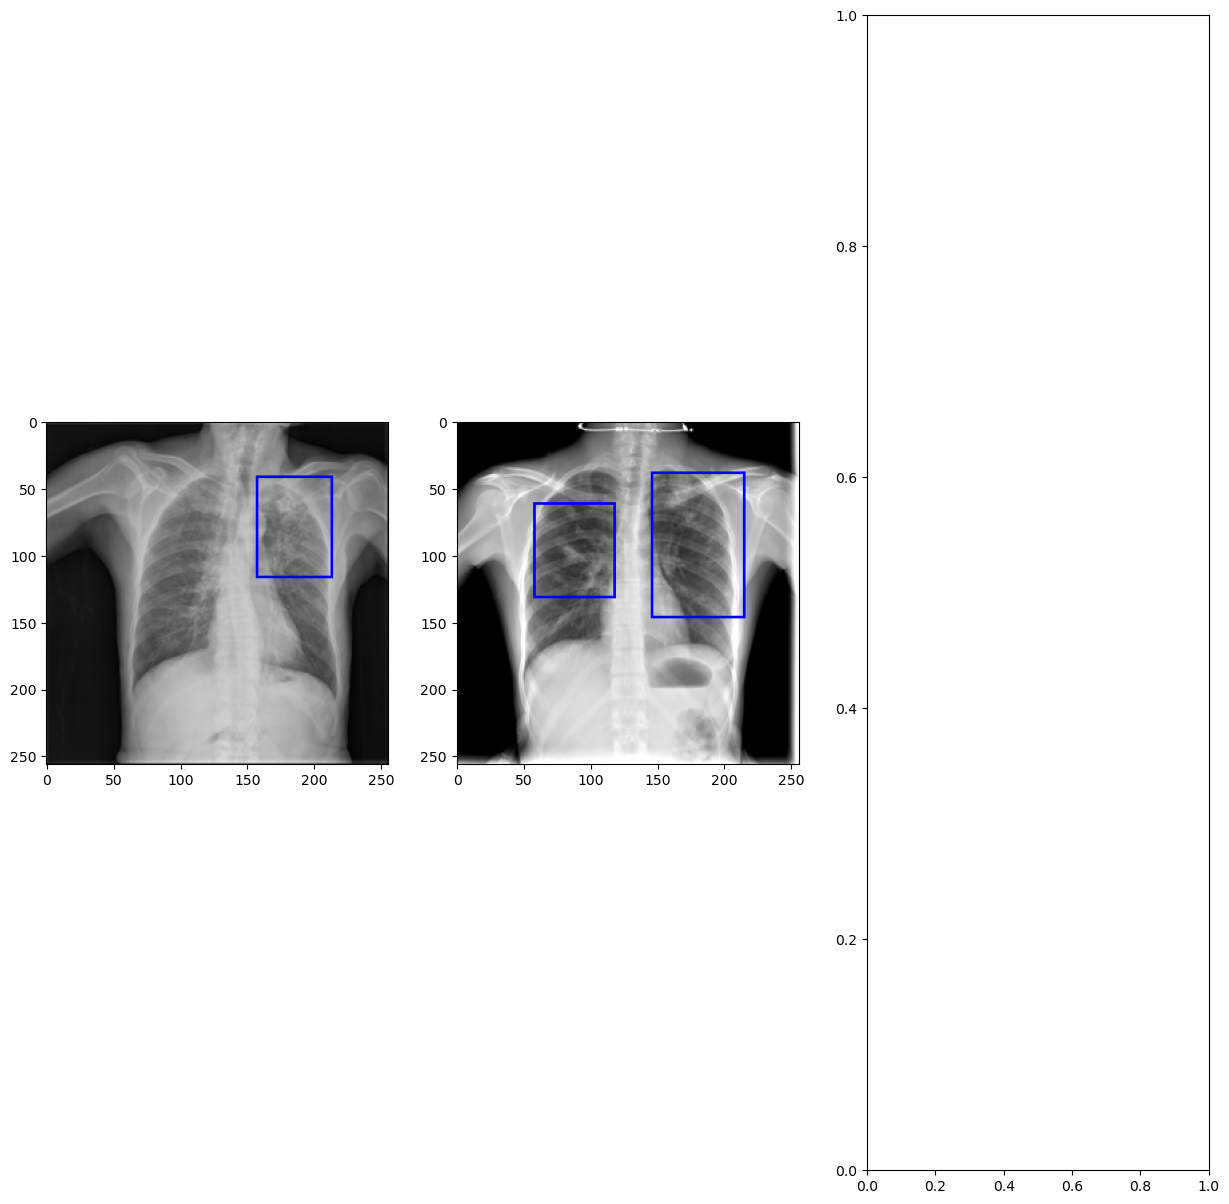

In [36]:
#show_images(train_image_ids[0:4], train_labels)
#show_images(train_image_ids[], out)

#show_images(train_image_ids[0:3], out_boxes , out_classes)

show_images(train_image_ids[0:2], out_boxes )




In [37]:
######################## CAT DOG

import random

import cv2
from matplotlib import pyplot as plt

import albumentations as A

In [38]:
########### CAT DOG

####################### using albumentations

BOX_COLOR = (255, 0, 0) # Red
BOX_COLOR2 = (0,0,255)
TEXT_COLOR = (255, 255, 255) # White

import matplotlib.pyplot as plt
def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
   
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR2, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
    )
    return img


def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name)
    plt.figure(figsize=(20, 20))
    plt.axis('off')
    plt.imshow(img)

In [45]:
import cv2
image = cv2.imread('/kaggle/working/TBX11K/imgs/train/tb/tb0595.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [40]:
#bboxes = [[5.66, 138.95, 147.09, 164.88], [366.7, 80.84, 132.8, 181.84]]
bboxes = [[308, 64, 461, 253], [389, 276, 460, 325]]
category_ids = [0, 1]
#category_ids = [17, 18]

# We will use the mapping from category_id to the class name
# to visualize the class label for the bounding box on the image
category_id_to_name = {0: 'Active TB', 1: 'Latent TB'}
#category_id_to_name = {17: 'cat', 18: 'dog'}

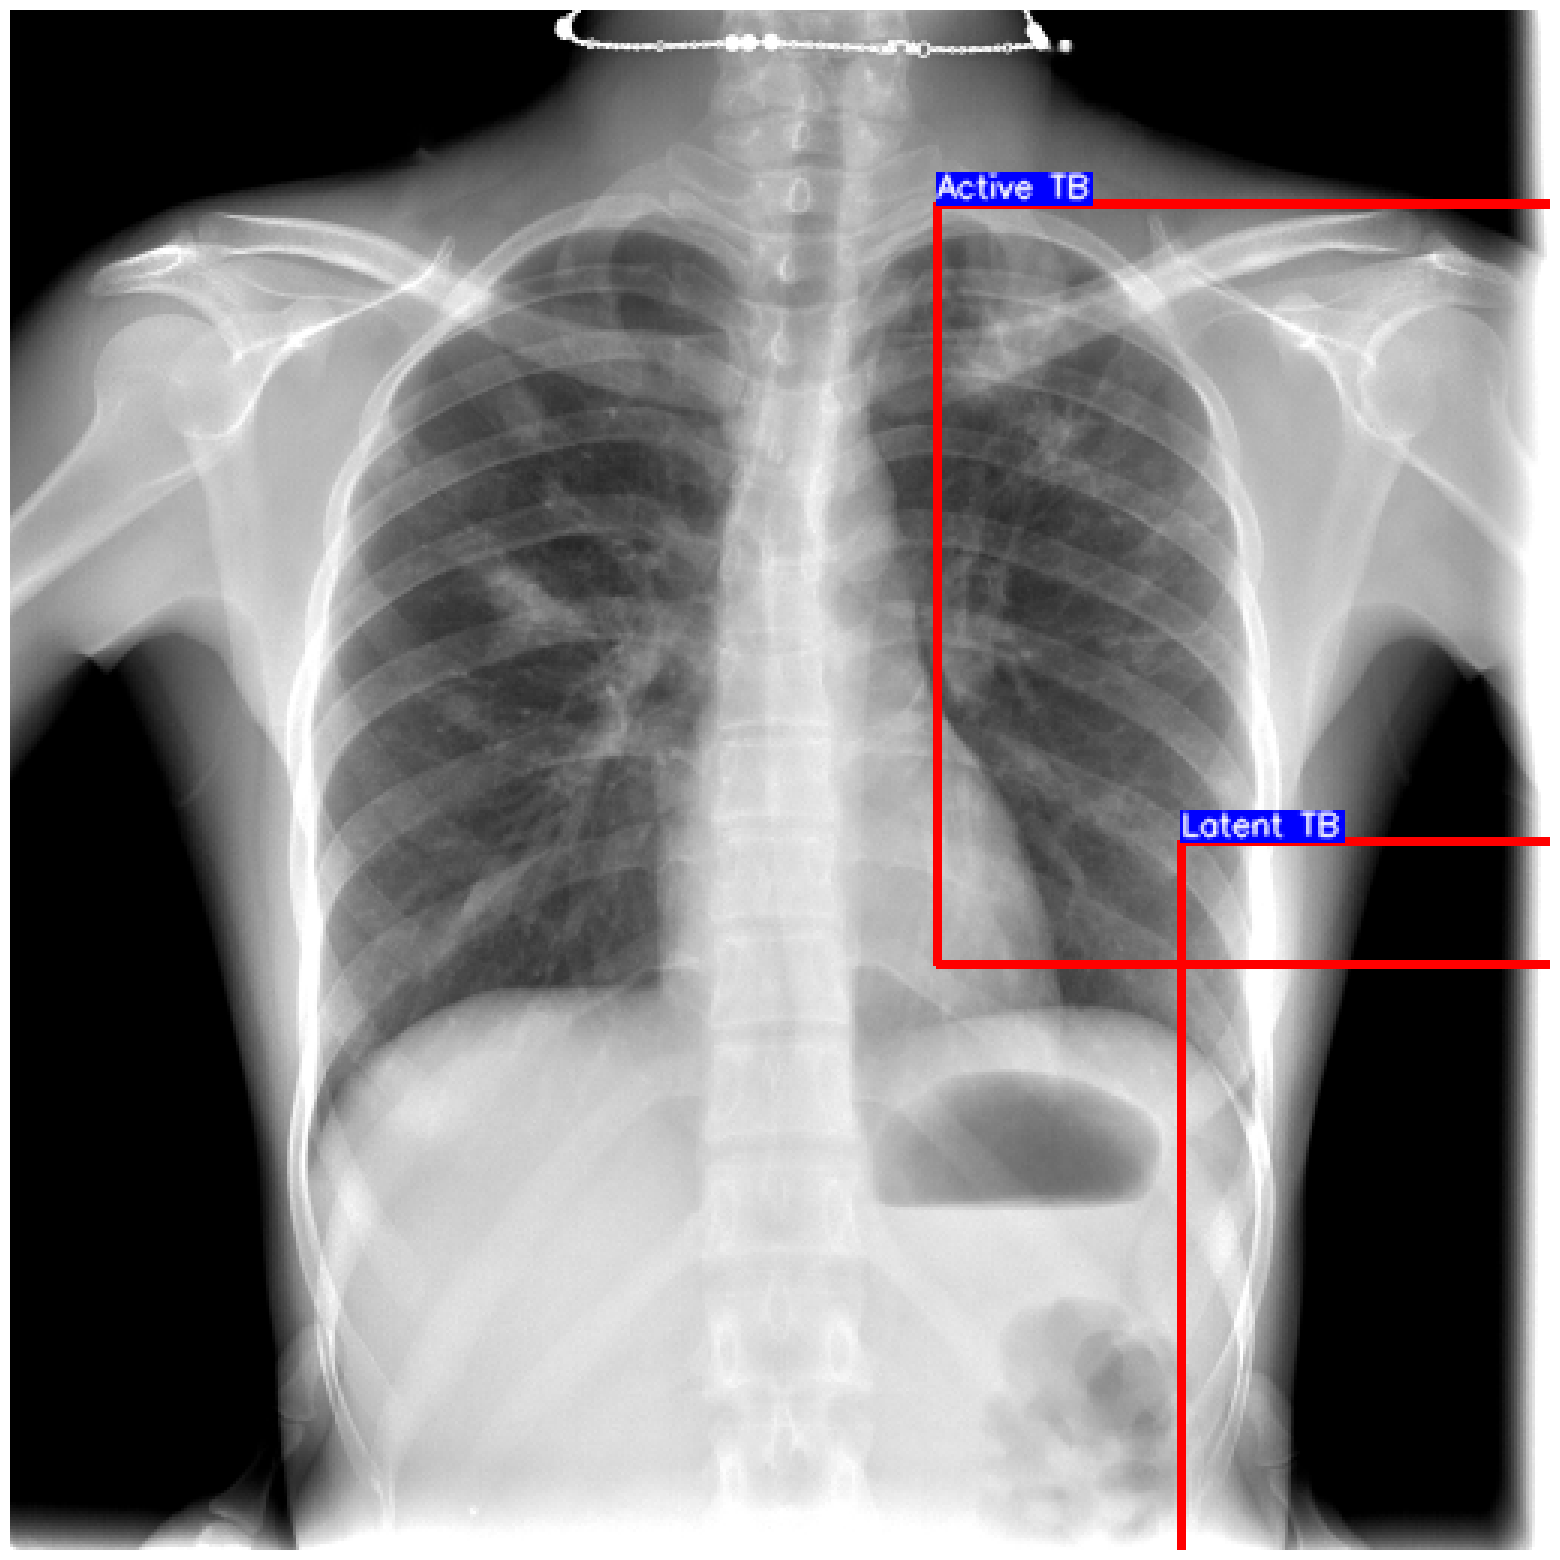

In [44]:
visualize(image, bboxes, category_ids, category_id_to_name)

In [ ]:
transform = A.Compose(
    #[A.RandomSizedBBoxSafeCrop(width=512, height=512, erosion_rate=0.2)],
    #bbox_params=A.BboxParams(format='pascal_voc', label_fields=['category_ids']),
     [A.Resize(height=256, width=256),
      #A.HorizontalFlip(p=0.5),
      A.RandomBrightnessContrast(p=0.2),
      A.ColorJitter(hue=0.8),
      #A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
     ],
     bbox_params=A.BboxParams(format='pascal_voc', label_fields=['category_ids'])
     
     #

)

In [ ]:
transform = A.Compose([
    A.RandomCrop(width=450, height=450),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
], bbox_params=A.BboxParams(format='coco'))

In [ ]:
random.seed(3)
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)

### Create Custom Data Pipeline

In [ ]:
class LungsAnnotationDataset(Dataset):
    def __init__(self,dataframe, image_dir, transforms=None):
        super().__init__()
        
        self.image_ids = dataframe['image_id'].unique()
        self.df = dataframe
        self.image_dir = image_dir
        #self.labels = torch.nn.functional.one_hot(torch.tensor(dataframe.class_id))
        self.transforms = transforms
    
    def __getitem__(self, index: int):
        image_id = self.image_ids[index]
        records = self.df[self.df['image_id'] == image_id]
        
        dcm_data = pydicom.read_file(f'{self.image_dir}/{image_id}.dicom')
        image = apply_voi_lut(dcm_data.pixel_array, dcm_data)
        # depending on this value, X-ray may look inverted - fix that:
        if dcm_data.PhotometricInterpretation == "MONOCHROME1":
            image = np.amax(image) - image
            
        #intercept = dcm_data.RescaleIntercept if "RescaleIntercept" in dcm_data else 0.0
        #slope = dcm_data.RescaleSlope if "RescaleSlope" in dcm_data else 1.0
        
        #if slope != 1:
        #    image = slope * image.astype(np.float64)
        #    image = image.astype(np.int16)
            
        #image += np.int16(intercept)
        image = np.stack([image, image, image])
        image = image - np.min(image)

        image = image / image.max()
        #image = image * 255.0
        #image = image.astype('float32')
        image = exposure.equalize_hist(image) #Normalization of X-ray images
        image = image.astype('float32')

        image = image.transpose(1,2,0)
        
        boxes = records[['x_min','y_min','x_max','y_max']].values
        #boxes[:, 2] = boxes[:, 0] + boxes[:, 2]
        #boxes[:, 3] = boxes[:, 1] + boxes[:, 3]
        
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        area = torch.as_tensor(area, dtype=torch.float32)
        
        labels = records.class_id.values + 1
        class_name = records.class_name.values
        # suppose all instances are not crowd
        iscrowd = torch.zeros((records.shape[0],), dtype=torch.int64)
        
        target = {}
        target['boxes'] = torch.tensor(boxes)
        target['labels'] = torch.tensor(labels)
        #target['class'] = class_name
        #target['image_id'] = torch.tensor([index])
        target['area'] = torch.tensor(area)
        target['iscrowd'] = torch.tensor(iscrowd)
        
        if self.transforms:
            sample = {
                'image': image,
                'bboxes': target['boxes'],
                'labels': labels
            }
            sample = self.transforms(**sample)
            image = sample['image']
            
            target['boxes'] = torch.tensor(sample['bboxes'])
            

        return image, target
    
    def __len__(self) -> int:
        return self.image_ids.shape[0]

In [ ]:
batch_size = 1

In [48]:
import tensorflow as tf

In [79]:
class DataGenerator(tf.keras.utils.Sequence):

    def __init__(self, image_ids, image_pixels,labels , batch_size=1, shuffle=False, augment=False):
        self.image_ids = image_ids
        self.image_pixels = image_pixels
        self.labels = labels
        #self.classes = classes
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.augment = augment
        self.on_epoch_end()
        
        self.image_grid = self.form_image_grid()
        
        
    def form_image_grid(self):    
        image_grid = np.zeros((32, 32, 4))

        # x, y, width, height
        cell = [0, 0, 256 / 32, 256 / 32] 

        for i in range(0, 32):
            for j in range(0, 32):
                image_grid[i,j] = cell

                cell[0] = cell[0] + cell[2]

            cell[0] = 0
            cell[1] = cell[1] + cell[3]

        return image_grid

def __len__(self):
    return int(np.floor(len(self.image_ids) / self.batch_size))


def on_epoch_end(self):
    self.indexes = np.arange(len(self.image_ids))

    if self.shuffle == True:
        np.random.shuffle(self.indexes)


DataGenerator.__len__ = __len__
DataGenerator.on_epoch_end = on_epoch_end

In [ ]:
#####   OLD CODE
#class DataGenerator(tf.keras.utils.Sequence):

    #def __init__(self, image_ids, image_pixels, labels=None, class_code,  batch_size=1, shuffle=False, augment=False):
        self.image_ids = image_ids
        self.image_pixels = image_pixels
        self.labels = labels
        #self.classes = class_code
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.augment = augment
        self.on_epoch_end()
        
        self.image_grid = self.form_image_grid()
        
        
   # def form_image_grid(self):    
        image_grid = np.zeros((32, 32, 4))

        # x, y, width, height
        cell = [0, 0, 256 / 32, 256 / 32] 

        for i in range(0, 32):
            for j in range(0, 32):
                image_grid[i,j] = cell

                cell[0] = cell[0] + cell[2]

            cell[0] = 0
            cell[1] = cell[1] + cell[3]

        return image_grid

def __len__(self):
    return int(np.floor(len(self.image_ids) / self.batch_size)


def on_epoch_end(self):
    self.indexes = np.arange(len(self.image_ids))

    if self.shuffle == True:
        np.random.shuffle(self.indexes)


DataGenerator.__len__ = __len__
DataGenerator.on_epoch_end = on_epoch_end

In [80]:
DataGenerator.train_augmentations = albu.Compose([
        #albu.HorizontalFlip(always_apply=False, p=0.5),
        albu.Resize(256,256,p=1.0),
        albu.CLAHE(p=1),
        albu.ToGray(p=1)
    ], 
    bbox_params={'format': 'pascal_voc', 'label_fields': ['labels']})

DataGenerator.val_augmentations = albu.Compose([
     albu.Resize(256,256,p=1.0),
     albu.CLAHE(p=1),
     albu.ToGray(p=1)
])

In [81]:
def __getitem__(self, index):
    indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]

    batch_ids = [self.image_ids[i] for i in indexes]

    X, y = self.__data_generation(batch_ids)
    print(batch_ids)

    return X, y


def __data_generation(self, batch_ids):
    X, y = [], []

    # Generate data
    for i, image_id in enumerate(batch_ids):
        pixels = self.image_pixels[image_id]
        bboxes = self.labels[image_id]
        #classes = self.classes[image_id]
        
        if self.augment:     
            pixels, bboxes = self.augment_image(pixels, bboxes)
        else:
            pixels = self.contrast_image(pixels)
            bboxes  = self.form_label_grid(bboxes)
            #classes = self.form_label_grid(classes)
        X.append(pixels)
        y.append(bboxes)
        #y.append(classes)

    return np.array(X), np.array(y)


def augment_image(self, pixels, bboxes ):
    bbox_labels = np.ones(len(bboxes))
    #labels = bbox_labels
    
    #print(self)
    aug_result = self.train_augmentations(image=pixels, bboxes=bboxes,  labels = bbox_labels)

    bboxes = self.form_label_grid(aug_result['bboxes'])
    
    #classes = self.form_label_grid(aug_result['classes'])

    return np.array(aug_result['image']) / 255, bboxes


    aug_result = self.val_augmentations(image=pixels)
    return np.array(aug_result['image']) / 255


def contrast_image(self, pixels):        
    aug_result = self.val_augmentations(image=pixels)
    return np.array(aug_result['image']) / 255

DataGenerator.__getitem__ = __getitem__
DataGenerator.__data_generation = __data_generation
DataGenerator.augment_image = augment_image
DataGenerator.contrast_image = contrast_image

In [ ]:
#form_label_grid([308.88, 64.84, 461.2, 253.73])

In [ ]:
classes

In [82]:
def form_label_grid(self, bboxes  ):
    label_grid = np.zeros((32, 32, 10))

    for i in range(0, 32):
        for j in range(0, 32):
            cell = self.image_grid[i,j]
            label_grid[i,j] = self.rect_intersect(cell, bboxes)

    return label_grid


def rect_intersect(self, cell, bboxes): 
    cell_x, cell_y, cell_width, cell_height = cell
    cell_x_max = cell_x + cell_width 
    cell_y_max = cell_y + cell_height
    
    anchor_one = np.array([0, 0, 0, 0, 0])
    anchor_two = np.array([0, 0, 0, 0, 0])
    
   # print(cell)

    # check all boxes
    for bbox in bboxes:
        box_x, box_y, box_width, box_height = bbox
        box_x_centre = box_x + (box_width / 2)
        box_y_centre = box_y + (box_height / 2)

        if(box_x_centre >= cell_x and box_x_centre < cell_x_max and box_y_centre >= cell_y and box_y_centre < cell_y_max):
            
            if anchor_one[0] == 0:
                anchor_one = self.yolo_shape(
                    [box_x, box_y, box_width, box_height], 
                    [cell_x, cell_y, cell_width, cell_height]
                )
            
            elif anchor_two[0] == 0:
                anchor_two = self.yolo_shape(
                    [box_x, box_y, box_width, box_height], 
                    [cell_x, cell_y, cell_width, cell_height]
                )
                
            else:
                break

    return np.concatenate((anchor_one, anchor_two), axis=None)


def yolo_shape(self, box, cell):
    box_x, box_y, box_width, box_height = box
    cell_x, cell_y, cell_width, cell_height = cell

    # top left x,y to centre x,y
    box_x = box_x + (box_width / 2)
    box_y = box_y + (box_height / 2)

    # offset bbox x,y to cell x,y
    box_x = (box_x - cell_x) / cell_width
    box_y = (box_y - cell_y) / cell_height

    # bbox width,height relative to cell width,height
    box_width = box_width / 256
    box_height = box_height / 256

    return [1, box_x, box_y, box_width, box_height]


DataGenerator.form_label_grid = form_label_grid
DataGenerator.rect_intersect = rect_intersect
DataGenerator.yolo_shape = yolo_shape

In [ ]:
##### OLD CODE ######

def form_label_grid(self, bboxes):
    label_grid = np.zeros((32, 32, 10))

    for i in range(0, 32):
        for j in range(0, 32):
            cell = self.image_grid[i,j]
            label_grid[i,j] = self.rect_intersect(cell, bboxes)

    return label_grid


def rect_intersect(self, cell, bboxes): 
    cell_x, cell_y, cell_width, cell_height = cell
    cell_x_max = cell_x + cell_width 
    cell_y_max = cell_y + cell_height
    
    anchor_one = np.array([0, 0, 0, 0, 0])
    anchor_two = np.array([0, 0, 0, 0, 0])   
    

    # check all boxes
    for bbox in bboxes:
        box_x, box_y, box_width, box_height = bbox
        box_x_centre = box_x + (box_width / 2)
        box_y_centre = box_y + (box_height / 2)

        if(box_x_centre >= cell_x and box_x_centre < cell_x_max and box_y_centre >= cell_y and box_y_centre < cell_y_max):
            
            if anchor_one[0] == 0:
                anchor_one = self.yolo_shape(
                    [box_x, box_y, box_width, box_height], 
                    [cell_x, cell_y, cell_width, cell_height]
                )
            
            elif anchor_two[0] == 0:
                anchor_two = self.yolo_shape(
                    [box_x, box_y, box_width, box_height], 
                    [cell_x, cell_y, cell_width, cell_height]
                )
                
            else:
                break

    return np.concatenate((anchor_one, anchor_two), axis=None)


def yolo_shape(self, box, cell):
    box_x, box_y, box_width, box_height = box
    cell_x, cell_y, cell_width, cell_height = cell

    # top left x,y to centre x,y
    box_x = box_x + (box_width / 2)
    box_y = box_y + (box_height / 2)

    # offset bbox x,y to cell x,y
    box_x = (box_x - cell_x) / cell_width
    box_y = (box_y - cell_y) / cell_height

    # bbox width,height relative to cell width,height
    box_width = box_width / 256
    box_height = box_height / 256

    return [1, box_x, box_y, box_width, box_height]


DataGenerator.form_label_grid = form_label_grid
DataGenerator.rect_intersect = rect_intersect
DataGenerator.yolo_shape = yolo_shape

In [135]:
train_generator = DataGenerator(
    train_image_ids,
    train_pixels,
    train_labels,
    #train_classes,
    batch_size=6, 
    shuffle=True,
    augment=True
)

val_generator = DataGenerator(
    val_image_ids, 
    val_pixels,
    val_labels,
    #train_classes,
    batch_size=6,
    shuffle=False,
    augment=True
)

image_grid = train_generator.image_grid

In [150]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

img_width = 256

img_height = 256

cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Flatten())
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'relu', units = 64))
cnn.add(Dense(activation = 'sigmoid', units = 1))
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy','categorical_crossentropy'])

In [151]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_353 (Conv2D)         (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_354 (Conv2D)         (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_355 (Conv2D)         (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 32)      

In [122]:
#from tensorflow.keras.utils import plot_model
#plot_model(cnn,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

In [123]:
early = EarlyStopping(monitor="val_loss", mode="min", patience=3)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]

#callbacks = [
    #tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.5, verbose=1),
    #tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True),
    #tf.keras.callbacks.ModelCheckpoint(monitor='val_loss', filepath='./object_detection_model.h5', save_best_only=True)
#]

In [125]:
image_annots_df_train.head(2)

,bbox,newclass_code
file_id,,
tb/tb0005.png,"[[190.92, 63.44, 211.04, 85.72]]",['0']
tb/tb0007.png,"[[153.65, 31.03, 221.41, 104.33], [72.06, 26.4...","['1', '1']"


In [130]:
%cd /kaggle/input/df-processed
df_alltrain = pd.read_csv('df_alltrain_finalbackupprocessed.csv')

/kaggle/input/df-processed


In [144]:
#np.unique(df_alltrain.newclass_code)

np.unique(image_annots_df_train.newclass_code)

#image_annots_df_train.head(2)

array(["['0', '0', '0', '0']", "['0', '0', '0']", "['0', '0', '1']",
       "['0', '0']", "['0', '1']", "['0']", "['1', '0', '0']",
       "['1', '0']", "['1', '1', '1']", "['1', '1']", "['1']", "['3']",
       "['4']"], dtype=object)

In [147]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight = "balanced", classes= np.unique(image_annots_df_train.newclass_code), y= image_annots_df_train.newclass_code)
class_weights = dict(zip(np.unique(image_annots_df_train.newclass_code), class_weights))
class_weights

{"['0', '0', '0', '0']": 507.61538461538464,
 "['0', '0', '0']": 33.84102564102564,
 "['0', '0', '1']": 253.80769230769232,
 "['0', '0']": 2.643830128205128,
 "['0', '1']": 36.25824175824176,
 "['0']": 1.9155297532656024,
 "['1', '0', '0']": 507.61538461538464,
 "['1', '0']": 84.6025641025641,
 "['1', '1', '1']": 253.80769230769232,
 "['1', '1']": 10.575320512820513,
 "['1']": 9.57764876632801,
 "['3']": 0.1692051282051282,
 "['4']": 0.1692051282051282}

In [145]:
class_weights = { '0': 2.3832872928176796, '1': 0.5751666666666667, '2': 9.6938202247191}

In [152]:
cnn_history = cnn.fit(train_generator,epochs=5, validation_data=val_generator, batch_size = 16, callbacks=callbacks_list)

#object_detection_history = object_detection_model.fit(train_generator, validation_data=val_generator, epochs=5,batch_size = 16, callbacks=callbacks)

['tb/tb0964.png', 'tb/tb0678.png', 'tb/tb0738.png', 'tb/tb0831.png', 'tb/tb0633.png', 'tb/tb0721.png']
Epoch 1/5


ValueError: in user code:

    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/opt/conda/lib/python3.10/site-packages/keras/losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "/opt/conda/lib/python3.10/site-packages/keras/losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/losses.py", line 1984, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/opt/conda/lib/python3.10/site-packages/keras/backend.py", line 5559, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, None, None, None) and (None, 1) are incompatible


In [84]:
x_input = tf.keras.Input(shape=(256,256,3))

x = tf.keras.layers.Conv2D(32, (3, 3), strides=(1, 1), padding='same')(x_input)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)

########## block 1 ##########
x = tf.keras.layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)

x_shortcut = x

for i in range(2):
    x = tf.keras.layers.Conv2D(32, (3, 3), strides=(1, 1), padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)

    x = tf.keras.layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)

    x = tf.keras.layers.Add()([x_shortcut, x])
    x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)

    x_shortcut = x


########## block 2 ##########
x = tf.keras.layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)

x_shortcut = x

for i in range(2):
    x = tf.keras.layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)

    x = tf.keras.layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)

    x = tf.keras.layers.Add()([x_shortcut, x])
    x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)

    x_shortcut = x

########## block 3 ##########
x = tf.keras.layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)

x_shortcut = x

for i in range(8):
    x = tf.keras.layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)

    x = tf.keras.layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)

    x = tf.keras.layers.Add()([x_shortcut, x])
    x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)

    x_shortcut = x

    
########## block 4 ##########
x = tf.keras.layers.Conv2D(512, (3, 3), strides=(2, 2), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)

x_shortcut = x

for i in range(8):
    x = tf.keras.layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)

    x = tf.keras.layers.Conv2D(512, (3, 3), strides=(1, 1), padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)

    x = tf.keras.layers.Add()([x_shortcut, x])
    x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)

    x_shortcut = x

########## block 5 ##########
x = tf.keras.layers.Conv2D(1024, (3, 3), strides=(2, 2), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)

x_shortcut = x

for i in range(4):
    x = tf.keras.layers.Conv2D(512, (3, 3), strides=(1, 1), padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)

    x = tf.keras.layers.Conv2D(1024, (3, 3), strides=(1, 1), padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)

    x = tf.keras.layers.Add()([x_shortcut, x])
    x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)

    x_shortcut = x

########## output layers ##########
x = tf.keras.layers.Conv2D(512, (3, 3), strides=(1, 1), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)

x = tf.keras.layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)

x = tf.keras.layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)

predictions = tf.keras.layers.Conv2D(10, (1, 1), strides=(1, 1), activation='sigmoid')(x)

object_detection_model = tf.keras.Model(inputs=x_input, outputs=predictions)

In [85]:
def custom_loss(y_true, y_pred):
    categorical_crossentropy = prob_loss = tf.keras.losses.CategoricalCrossentropy(
        reduction=tf.keras.losses.Reduction.SUM_OVER_BATCH_SIZE
    )
    
    prob_loss = categorical_crossentropy(
        tf.concat([y_true[:,:,:,0], y_true[:,:,:,5]], axis=0), 
        tf.concat([y_pred[:,:,:,0], y_pred[:,:,:,5]], axis=0)
    )
    
    xy_loss = tf.keras.losses.MSE(
        tf.concat([y_true[:,:,:,1:3], y_true[:,:,:,6:8]], axis=0), 
        tf.concat([y_pred[:,:,:,1:3], y_pred[:,:,:,6:8]], axis=0)
    )
    
    wh_loss = tf.keras.losses.MSE(
        tf.concat([y_true[:,:,:,3:5], y_true[:,:,:,8:10]], axis=0), 
        tf.concat([y_pred[:,:,:,3:5], y_pred[:,:,:,8:10]], axis=0)
    )
    
    bboxes_mask = get_mask(y_true)
    
    xy_loss = xy_loss * bboxes_mask
    wh_loss = wh_loss * bboxes_mask
    
    return prob_loss + xy_loss + wh_loss


def get_mask(y_true):
    anchor_one_mask = tf.where(
        y_true[:,:,:,0] == 0, 
        0.5, 
        5.0
    )
    
    anchor_two_mask = tf.where(
        y_true[:,:,:,5] == 0, 
        0.5, 
        5.0
    )
    
    bboxes_mask = tf.concat(
        [anchor_one_mask,anchor_two_mask],
        axis=0
    )
    
    return bboxes_mask

In [86]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

object_detection_model.compile(
    optimizer=optimizer, 
    loss=custom_loss,
    metrics=['accuracy']
)

In [87]:
callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.5, verbose=1),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint(monitor='val_loss', filepath='./object_detection_model.h5', save_best_only=True)
]

In [ ]:
%cd /kaggle/working/tbx-11/TBX11K

In [88]:

#import tensorflow as tf
#run_opts = tf.compat.v1.RunOptions(report_tensor_allocations_upon_oom = True)

object_detection_history = object_detection_model.fit(train_generator, validation_data=val_generator, epochs=5, callbacks=callbacks)

['tb/tb0903.png', 'tb/tb0879.png', 'tb/tb0841.png', 'tb/tb0895.png', 'tb/tb0686.png', 'tb/tb0678.png']
Epoch 1/5
['tb/tb0880.png', 'tb/tb0602.png', 'tb/tb0654.png', 'tb/tb0916.png', 'tb/tb0755.png', 'tb/tb0957.png']
['tb/tb0645.png', 'tb/tb0776.png', 'tb/tb0669.png', 'tb/tb0926.png', 'tb/tb0882.png', 'tb/tb0609.png']
32/32 [==============================] - ETA: 0s - loss: 0.1593 - accuracy: 0.8233['tb/tb0990.png', 'tb/tb0991.png', 'tb/tb0994.png', 'tb/tb0996.png', 'tb/tb0997.png', 'tb/tb0998.png']
['tb/tb0990.png', 'tb/tb0991.png', 'tb/tb0994.png', 'tb/tb0996.png', 'tb/tb0997.png', 'tb/tb0998.png']
['tb/tb0999.png', 'tb/tb1000.png', 'tb/tb1002.png', 'tb/tb1003.png', 'tb/tb1004.png', 'tb/tb1005.png']
['tb/tb1006.png', 'tb/tb1008.png', 'tb/tb1010.png', 'tb/tb1013.png', 'tb/tb1014.png', 'tb/tb1015.png']
['tb/tb1017.png', 'tb/tb1018.png', 'tb/tb1020.png', 'tb/tb1022.png', 'tb/tb1023.png', 'tb/tb1027.png']
['tb/tb1029.png', 'tb/tb1032.png', 'tb/tb1034.png', 'tb/tb1036.png', 'tb/tb1037.png'

In [89]:
def prediction_to_bbox(bboxes, image_grid):    
    bboxes = bboxes.copy()
    
    im_width = (image_grid[:,:,2] * 32)
    im_height = (image_grid[:,:,3] * 32)
    
    # descale x,y
    bboxes[:,:,1] = (bboxes[:,:,1] * image_grid[:,:,2]) + image_grid[:,:,0]
    bboxes[:,:,2] = (bboxes[:,:,2] * image_grid[:,:,3]) + image_grid[:,:,1]
    bboxes[:,:,6] = (bboxes[:,:,6] * image_grid[:,:,2]) + image_grid[:,:,0]
    bboxes[:,:,7] = (bboxes[:,:,7] * image_grid[:,:,3]) + image_grid[:,:,1]
    
    # descale width,height
    bboxes[:,:,3] = bboxes[:,:,3] * im_width 
    bboxes[:,:,4] = bboxes[:,:,4] * im_height
    bboxes[:,:,8] = bboxes[:,:,8] * im_width 
    bboxes[:,:,9] = bboxes[:,:,9] * im_height
    
    # centre x,y to top left x,y
    bboxes[:,:,1] = bboxes[:,:,1] - (bboxes[:,:,3] / 2)
    bboxes[:,:,2] = bboxes[:,:,2] - (bboxes[:,:,4] / 2)
    bboxes[:,:,6] = bboxes[:,:,6] - (bboxes[:,:,8] / 2)
    bboxes[:,:,7] = bboxes[:,:,7] - (bboxes[:,:,9] / 2)
    
    # width,heigth to x_max,y_max
    bboxes[:,:,3] = bboxes[:,:,1] + bboxes[:,:,3]
    bboxes[:,:,4] = bboxes[:,:,2] + bboxes[:,:,4]
    bboxes[:,:,8] = bboxes[:,:,6] + bboxes[:,:,8]
    bboxes[:,:,9] = bboxes[:,:,7] + bboxes[:,:,9]
    
    return bboxes

In [98]:
def non_max_suppression(predictions, top_n):
    probabilities = np.concatenate((predictions[:,:,0].flatten(), predictions[:,:,5].flatten()), axis=None)
    
    first_anchors = predictions[:,:,1:5].reshape((32*32, 4))
    second_anchors = predictions[:,:,6:10].reshape((32*32, 4))
    
    bboxes = np.concatenate(
        (first_anchors,second_anchors),
        axis=0
    )
    
    bboxes = switch_x_y(bboxes)
    bboxes, probabilities = select_top(probabilities, bboxes, top_n=top_n)
    bboxes = switch_x_y(bboxes)
    
    return bboxes


def switch_x_y(bboxes):
    x1 = bboxes[:,0].copy()
    y1 = bboxes[:,1].copy()
    x2 = bboxes[:,2].copy()
    y2 = bboxes[:,3].copy()
    
    bboxes[:,0] = y1
    bboxes[:,1] = x1
    bboxes[:,2] = y2
    bboxes[:,3] = x2
    
    return bboxes


def select_top(probabilities, boxes, top_n=10):
    top_indices = tf.image.non_max_suppression(
        boxes = boxes, 
        scores = probabilities, 
        max_output_size = top_n, 
        iou_threshold = 0.3,
        score_threshold = 0.3
    )
    
    top_indices = top_indices.numpy()
    
    return boxes[top_indices], probabilities[top_indices]

In [100]:
def process_predictions(predictions, image_ids, image_grid):
    bboxes = {}
    
    for i, image_id in enumerate(image_ids):
        predictions[i] = prediction_to_bbox(predictions[i], image_grid)
        bboxes[image_id] = non_max_suppression(predictions[i], top_n=100)
        
        # back to coco shape
        bboxes[image_id][:,2:4] = bboxes[image_id][:,2:4] - bboxes[image_id][:,0:2]
    
    return bboxes

In [101]:
val_predictions = object_detection_model.predict(val_generator)
val_predictions = process_predictions(val_predictions, val_image_ids, image_grid)

['tb/tb0990.png', 'tb/tb0991.png', 'tb/tb0994.png', 'tb/tb0996.png', 'tb/tb0997.png', 'tb/tb0998.png']
['tb/tb0990.png', 'tb/tb0991.png', 'tb/tb0994.png', 'tb/tb0996.png', 'tb/tb0997.png', 'tb/tb0998.png']
15/15 [==============================] - 9s 618ms/step


IndexError: index 90 is out of bounds for axis 0 with size 90

In [103]:
val_predictions = object_detection_model.predict(val_generator)
val_predictions = process_predictions(val_predictions, val_image_ids, image_grid)

['tb/tb0990.png', 'tb/tb0991.png', 'tb/tb0994.png', 'tb/tb0996.png', 'tb/tb0997.png', 'tb/tb0998.png']
['tb/tb0990.png', 'tb/tb0991.png', 'tb/tb0994.png', 'tb/tb0996.png', 'tb/tb0997.png', 'tb/tb0998.png']
15/15 [==============================] - 9s 624ms/step


IndexError: index 90 is out of bounds for axis 0 with size 90

In [104]:
val_predictions[1]

array([[[ 2.29654223e-01, -2.48445129e+01, -2.11854382e+01, ...,
         -2.24500313e+01,  2.30974655e+01,  2.84467010e+01],
        [ 5.46602249e-01, -9.05215549e+00, -1.41333208e+01, ...,
         -1.67771854e+01,  4.19572182e+01,  2.24554081e+01],
        [ 9.80471015e-01,  8.06529236e+00, -3.67316723e+00, ...,
         -4.82498455e+00,  7.10283508e+01,  7.91424656e+00],
        ...,
        [ 6.27439737e-01,  2.22144455e+02, -5.20273781e+00, ...,
         -2.05147195e+00,  3.17641113e+02,  9.78192139e+00],
        [ 8.44839931e-01,  2.32566360e+02, -5.28724813e+00, ...,
         -6.11586571e-02,  3.48636780e+02,  1.11413269e+01],
        [ 9.27007854e-01,  2.33120285e+02, -5.69286108e+00, ...,
         -5.02741814e-01,  3.08369568e+02,  1.89881325e+00]],

       [[ 5.38372874e-01, -2.03990593e+01, -4.02531719e+00, ...,
         -9.40060139e+00,  2.18107815e+01,  3.22988434e+01],
        [ 9.66098845e-01, -3.32139015e-01,  5.60124254e+00, ...,
          5.73710823e+00,  2.45092926e

In [105]:
show_images(val_image_ids[0:2], val_predictions)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [95]:
print('Epochs: ' + str(len(object_detection_history.history['loss'])))
print('Final training loss: ' + str(object_detection_history.history['loss'][-1]))
print('Final validation loss: ' + str(object_detection_history.history['val_loss'][-1]))

Epochs: 5
Final training loss: 0.05451207235455513
Final validation loss: 0.10982298105955124


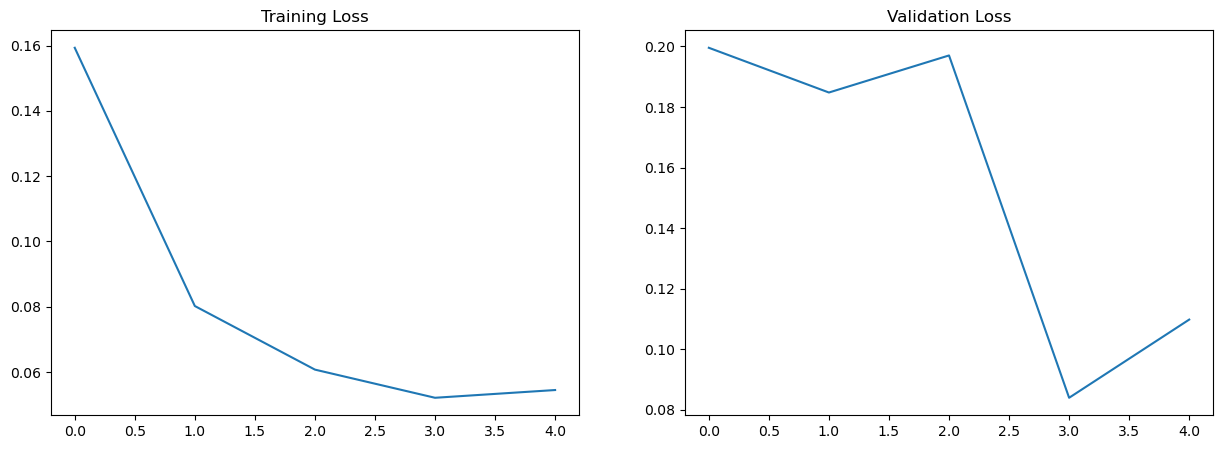

In [96]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].set_title('Training Loss')
ax[0].plot(object_detection_history.history['loss'])

ax[1].set_title('Validation Loss')
ax[1].plot(object_detection_history.history['val_loss'])

In [97]:
layer_outputs = [layer.output for layer in object_detection_model.layers]
evaluation_model = tf.keras.Model(inputs=object_detection_model.input, outputs=layer_outputs)

In [ ]:
image = Image.open('/kaggle/working/tbx-11/TBX11K/imgs/train/' + train_image_ids[1] )
image = image.resize((256, 256))

pixels = np.asarray(image) / 255
pixels = np.expand_dims(pixels, axis=0)

In [ ]:
num_of_layers = len(layer_outputs)

fig, axes = plt.subplots(2, 6, figsize=(20, 10))

layer = 0
for i in range(0, 2):
    for j in range(0, 6):
        layer_output = evaluation_model.predict(pixels)[layer]
        axes[i, j].imshow(layer_output[0, :, :, 1], cmap='gray')
        
        layer = layer + 1

# TEST IMAGES

In [106]:
#test_image_ids = os.listdir('/kaggle/input/global-wheat-detection/test/')
#test_image_ids = [image_id[:-4] for image_id in test_image_ids]

#train_image_ids = np.unique(image_annots_df_train.index.values)[6300:6497]
test_image_ids = np.unique(image_annots_df_train.index.values)[6592:6593]


In [107]:
test_image_ids

array(['tb/tb1185.png'], dtype=object)

In [109]:
test_predictions = []

for i, image_id in enumerate(test_image_ids):
    image = Image.open('/kaggle/working/TBX11K/imgs/train/' + image_id )
    image = image.resize((256, 256))            

    pixels = np.asarray(image)

    val_augmentations = albu.Compose([
        albu.CLAHE(p=1),
        albu.ToGray(p=1)
    ])

    aug_result = val_augmentations(image=pixels)
    pixels = np.array(aug_result['image']) / 255
    
    pixels = np.expand_dims(pixels, axis=0)
    
    bboxes = object_detection_model.predict(pixels)

    test_predictions.append(bboxes)
    
test_predictions = np.concatenate(test_predictions)

1/1 [==============================] - 3s 3s/step


In [118]:
test_predictions[0:1]

array([[[[7.86605299e-01, 1.00436918e-01, 9.40129831e-02, ...,
          2.69858718e-01, 1.40841708e-01, 2.00187951e-01],
         [9.90867853e-01, 7.97659457e-02, 2.77242046e-02, ...,
          1.26800820e-01, 1.19469509e-01, 8.37102756e-02],
         [9.99894977e-01, 7.96189755e-02, 9.57569294e-03, ...,
          7.03977644e-02, 1.50188103e-01, 2.39235684e-02],
         ...,
         [8.88775289e-01, 8.09878334e-02, 6.52844552e-04, ...,
          6.24012411e-01, 9.45178449e-01, 4.34583239e-03],
         [9.92650568e-01, 1.58097804e-01, 5.33383898e-03, ...,
          9.10418987e-01, 9.91737068e-01, 3.64478678e-03],
         [9.92896616e-01, 5.47480434e-02, 5.53872483e-03, ...,
          4.65736687e-02, 6.76382720e-01, 1.03734841e-04]],

        [[9.60906029e-01, 6.51092380e-02, 3.85215990e-02, ...,
          1.87737092e-01, 7.94875175e-02, 9.02415216e-02],
         [9.99816954e-01, 2.69475430e-02, 4.12412686e-03, ...,
          5.99881336e-02, 4.63465527e-02, 1.29939346e-02],
        

In [115]:
show_images(test_image_ids[0], test_predictions, source='test')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
# NEW

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
DataGenerator.train_augmentations = albu.Compose([
        ToTensorV2()
    ], 
    bbox_params={'format': 'coco', 'label_fields': ['labels']})

DataGenerator.val_augmentations = albu.Compose([
        ToTensorV2()
])


# Albumentations
#def get_train_transform():
    #return A.Compose([
      #  ToTensorV2(),
    #], bbox_params={'format': 'pascal_voc', 'label_fields': ['labels']})

#def get_valid_transform():
    #return A.Compose([
        #ToTensorV2(),
   # ], bbox_params={'format': 'pascal_voc', 'label_fields': ['labels']})

In [ ]:
### CODE FROM 

#https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8

In [ ]:
from torch.utils.data import Dataset
from torchvision import transforms
import albumentations
import albumentations.pytorch

class AlbumentationsDataset(Dataset):
    """__init__ and __len__ functions are the same as in TorchvisionDataset"""
    def __init__(self, file_paths, labels, transform=None):
        self.file_paths = file_paths
        self.labels = labels
        self.transform = transform
        
    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        label = self.labels[idx]
        file_path = self.file_paths[idx]
        
        # Read an image with OpenCV
        image = cv2.imread(file_path)
        
        # By default OpenCV uses BGR color space for color images,
        # so we need to convert the image to RGB color space.
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        start_t = time.time()
        if self.transform:
            augmented = self.transform(image=image) 
            image = augmented['image']
	    total_time = (time.time() - start_t)
        return image, label, total_time

In [ ]:
# Same transform with torchvision_transform
albumentations_transform = albumentations.Compose([
    albumentations.Resize(256, 256), 
    albumentations.RandomCrop(224, 224),
    albumentations.HorizontalFlip(), # Same with transforms.RandomHorizontalFlip()
    albumentations.pytorch.transforms.ToTensor()
])

In [ ]:
# Same dataset with torchvision_dataset
albumentations_dataset = AlbumentationsDataset(
    file_paths=["/content/drive/MyDrive/img5.jpg"],
    labels=[1],
    transform=albumentations_transform,
)
total_time = 0
for i in range(100):
  sample, _, transform_time = albumentations_dataset[0]
  total_time += transform_time

print("albumentations time/sample: {} ms".format(total_time*10))

plt.figure(figsize=(10, 10))
plt.imshow(transforms.ToPILImage()(sample))
plt.show()

> old code 

In [ ]:
# replace the classifier with a new one, that has
# num_classes which is user-defined
num_classes = 15  # 14 class (anomalies) + background

# get number of input features for the classifier
#backbone = torchvision.models.mobilenet_v2(pretrained=True).features
#backbone.out_channels = 1280
#model = RetinaNet(backbone,
#                 num_classes=num_classes)

# load a model; pre-trained on COCO
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
# get number of input features for the classifier
in_features = model.roi_heads.box_predictor.cls_score.in_features

# replace the pre-trained head with a new one
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

In [ ]:
model.to(device)
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.0005, momentum=0.9, weight_decay=0.0005)
#torch.optim.Adam(params, lr = 1e-3)
#lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.1)
lr_scheduler = None

num_epochs = 4

>>>>>>>>>>>>>>>>>>.old code

In [ ]:
#GPT


import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define the paths to the TBX11K dataset
train_images_dir = 'path/to/train/images'
train_annotations_dir = 'path/to/train/annotations'

# Define the number of classes
num_classes = <number_of_cla ses>

# Define the input image size for the model
input_size = (224, 224)  # Adjust according to your model's input size

# Define the batch size
batch_size = <batch_size>

# Load the image filenames and corresponding annotation filenames
image_filenames = sorted(os.listdir(train_images_dir))
annotation_filenames = sorted(os.listdir(train_annotations_dir))

# Create a list of image paths and annotation paths
image_paths = [os.path.join(train_images_dir, filename) for filename in image_filenames]
annotation_paths = [os.path.join(train_annotations_dir, filename) for filename in annotation_filenames]

# Define a function to read and preprocess the data
def preprocess_data(image_path, annotation_path):
    # Read the image
    image = load_img(image_path, target_size=input_size)
    image = img_to_array(image)
    image = image / 255.0  # Normalize pixel values

    # Read the annotation file and process it
    with open(annotation_path, 'r') as f:
        # Process the annotation file as needed
        # Parse the bounding box coordinates and class labels

    # Convert the bounding box coordinates and class labels to tensors

    return image, (bounding_boxes, class_labels)

# Create a dataset from the image and annotation paths
dataset = tf.data.Dataset.from_tensor_slices((image_paths, annotation_paths))

# Apply the preprocess_data function to each element of the dataset
dataset = dataset.map(preprocess_data)

# Shuffle and batch the dataset
dataset = dataset.shuffle(buffer_size=1000)
dataset = dataset.batch(batch_size)

# Prefetch the data for improved performance
dataset = dataset.prefetch(tf.data.AUTOTUNE)

# Set up the training data generator
train_data_generator = iter(dataset)




In [ ]:
%matplotlib inline

def plot_boxes(image, data, title):    
    img = cv2.cvtColor(image.numpy(), cv2.COLOR_GRAY2RGB)
    
    for i, row in data.iterrows():
    
        x1, y1 = row["x_min"], row["y_min"]
        x2, y2 = row["x_max"], row["y_max"]
    
        cv2.rectangle(
            img,
            pt1 = (x1, y1),
            pt2 = (x2, y2),
            color = row["colors"],
            thickness = 2
        )
    
        cv2.putText(
            img, 
            row["class_name"], 
            (x1, y1-5), 
            cv2.FONT_HERSHEY_SIMPLEX, 
            0.5, 
            row["colors"], 
            1
        )

    plt.figure(figsize = (8, 8))
    plt.imshow(img) 
    plt.title(title)

plot_boxes(image, data, "Image extracted from TFRecord")

##### MODEL SELECTION 

In [ ]:
# Download EfficientDet from Model Zoo
url = "http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d0_coco17_tpu-32.tar.gz"
path = "/kaggle/working/workspace/pretrained_models"
r = requests.get(url)

# Extract model
thetarfile = tarfile.open(
    fileobj = BytesIO(r.content), 
    mode = "r|gz"
)

# Save model
thetarfile.extractall(path = path)

In [ ]:
%cd /kaggle/working/workspace/pretrained_models
!ls

### MODEL CONFIGURATION

In [ ]:
# Moving pipeline.config file to models directory
fname = "pipeline.config"
model_name = "efficientdet_d0_coco17_tpu-32"

src = os.path.join(path, model_name, fname)
dst = src.replace("pretrained_", "").replace(fname, "")

os.makedirs(dst, exist_ok = True)

copy2(src, dst)

In [ ]:
%cd /workspace

In [ ]:
path_label = "/kaggle/input/vinbig-tfrecords-for-object-detection/LabelMap.pbtxt" 
LabelMap = map_util.create_category_index_from_labelmap(
    path_label, 
    use_display_name = True
)

In [ ]:
annot_dir = os.listdir(path_annot)
random.Random(0).shuffle(annot_dir)

train_data = annot_dir[:-4]
train_data = [os.path.join(path_annot, d) for d in train_data]

valid_data = annot_dir[-4:-2]
valid_data = [os.path.join(path_annot, d) for d in valid_data]

test_data = annot_dir[-2:]
test_data = [os.path.join(path_annot, d) for d in test_data]

In [ ]:
# Making recommended changes
fpath = os.path.join(dst, fname)
config_dic = config_util.get_configs_from_pipeline_file(fpath)

config_dic["model"].ssd.num_classes = len(LabelMap)
config_dic["model"].ssd.image_resizer.keep_aspect_ratio_resizer.min_dimension = 100

config_dic["train_config"].batch_size = 16
config_dic["train_config"].fine_tune_checkpoint = os.path.join(path, model_name, "checkpoint/ckpt-0")
config_dic["train_config"].fine_tune_checkpoint_type = "detection"
config_dic["train_config"].use_bfloat16 = False # Set to True if training on a TPU
config_dic["train_config"].num_steps = 1_000

config_dic["train_input_config"].label_map_path = path_label
config_dic["train_input_config"].tf_record_input_reader.input_path[:] = train_data

config_dic["eval_input_configs"][0].label_map_path = path_label
config_dic["eval_input_configs"][0].tf_record_input_reader.input_path[:] = valid_data

In [ ]:
# Save recommended changes
config = config_util.create_pipeline_proto_from_configs(config_dic)
config_util.save_pipeline_config(config, dst)

### FINE TUNING 

In [ ]:
!python /kaggle/working/workspace/model_main_tf2.py --model_dir=$dst --pipeline_config_path=$fpath

### EXPORTING

In [ ]:
!python /kaggle/working/workspace/exporter_main_v2.py --input_type=image_tensor --pipeline_config_path=$fpath --trained_checkpoint_dir=$dst --output_directory=/kaggle/working/workspace/exported_models/$model_name

In [ ]:
%cd saved_model
!ls

In [ ]:
!ls

In [ ]:
# To export model outside, first compress it
#tar_model_name = model_name + ".tar.gz"
!tar -zcvf workspace/exported_models/$model_name+".tar.gz" workspace/exported_models/$model_name

# POST PROCESSING 

In [ ]:
for shard in test_data[:1]:
    raw_dataset = tf.data.TFRecordDataset(shard)
    
    for raw_record in raw_dataset.take(1): # Select one shard from the TFRecords dataset
        example = tf.train.Example()
        example.ParseFromString(raw_record.numpy())

In [ ]:
img_encoded = example.features.feature['image/encoded'].bytes_list.value[1]
img = tf.io.decode_jpeg(img_encoded)
img = cv2.cvtColor(img.numpy(), cv2.COLOR_GRAY2RGB)
img = img[tf.newaxis, ...]

detector = tf.saved_model.load(os.path.join("/kaggle/working/workspace/exported_models", "efficientdet_d0_coco17_tpu-32", "saved_model"))
result = detector(img)

In [ ]:
result = {k:v.numpy() for k, v in result.items()}

In [ ]:
viz_util.visualize_boxes_and_labels_on_image_array(
    image = img[0], 
    boxes = result['detection_boxes'][0],
    classes = (result['detection_classes'][0]).astype(int), 
    scores = result['detection_scores'][0],
    category_index = LabelMap,
    use_normalized_coordinates = True,
    min_score_thresh = 0.4,
    line_thickness = 3,
    max_boxes_to_draw = 100,
)

In [ ]:
%matplotlib inline

plt.figure(figsize = (8, 8))
plt.imshow(img[0])
plt.title("Prediction")
plt.show()

### EVALUATING PERFORMANCE

In [ ]:
data, image = GetData(example)

In [ ]:
plot_boxes(image, data, "Ground Truth")

In [ ]:
############## SSD MOBILENET 

In [ ]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
from keras.callbacks import ModelCheckpoint, EarlyStopping
print(tf.__version__)


mobile_net = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
#mobile_net = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4'
mobile_net = hub.KerasLayer( mobile_net, input_shape=(224,224,3), trainable = False)


#num_label = len(np.unique(y))
num_label = 3
modelMnet = keras.Sequential([
mobile_net,
#keras.layers.Dropout(0.2),
keras.layers.Dense(num_label)
])

modelMnet.summary()


In [ ]:
From sklearn.model_selection import train_test_split

X_train , X_test_val, y_train , y_test_val = train_test_split(X, y, train_size =0.8, random_state =42)
X_test, X_val ,y_test, y_val = train_test_split(X_test_val, y_test_val, random_state = 42)
X_train.shape, X_val.shape, X-test.shape, y_train.shape, y_val.shaoe, y_test.shape

In [ ]:
From sklearn.model_selection import train_test_split

X_train , X_test_val, y_train , y_test_val = train_test_split(X, y, train_size =0.8, random_state =42)
X_test, X_val ,y_test, y_val = train_test_split(X_test_val, y_test_val, random_state = 42)
X_train.shape, X_val.shape, X-test.shape, y_train.shape, y_val.shaoe, y_test.shape


#Split Dataframe into Train, Valid, and Test
train_df, test_df = train_test_split(df, train_size=0.95, random_state=0)
train_df, valid_df = train_test_split(train_df, train_size=0.9, random_state=0)
print(train_df.labels.value_counts())
print(valid_df.labels.value_counts())
print(test_df.labels.value_counts())



In [ ]:
train_df

In [ ]:
valid_df

In [ ]:
test_df

In [ ]:
from tensorflow.keras.applications.efficientnet import preprocess_input

target_size=(224,224)
batch_size=16
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, horizontal_flip=True)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_gen = train_datagen.flow_from_dataframe(train_df, x_col='file_paths', y_col='label_cat', target_size=target_size, batch_size=batch_size, color_mode='rgb', class_mode='input')
valid_gen = test_datagen.flow_from_dataframe(valid_df, x_col='file_paths', y_col='label_cat', target_size=target_size, batch_size=batch_size, color_mode='rgb', class_mode='input')
test_gen = test_datagen.flow_from_dataframe(test_df, x_col='file_paths', y_col='label_cat', target_size=target_size, batch_size=batch_size, color_mode='rgb', class_mode='input')

In [ ]:
modelMnet.compile(
optimizer ="adam",
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#loss='categorical_crossentropy',
metrics = ['acc'])

#early_stopping = EarlyStopping(monitor ='val_loss', mode='min', patience =25, verbose = 1)
mc = ModelCheckpoint('best_model.h5', monitor ='val_loss', mode='min', save_best_only =True)
#history =model.fit(X_train, y_train, epochs =100, validation_data =(X_val,y_val), callbacks=[early_stopping,mc])


#history =modelMnet.fit(train_gen, validation_data=valid_gen, epochs=30, callbacks=[early_stopping,mc], verbose=1)
history =modelMnet.fit(train_gen, validation_data=valid_gen, epochs=30,  verbose=1)


##### DENSENET

In [ ]:
train_gen

In [ ]:
class_weights

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight = "balanced", classes= np.unique(train_gen.classes), y= train_gen.classes)
class_weights = dict(zip(np.unique(train_gen.classes), class_weights))
class_weights

In [ ]:
healthy = list(data_dir.glob('health/*'))
tb = list(data_dir.glob('tb/*'))
sick = list(data_dir.glob('sick/*'))

print("Length of healthy: ", len(healthy))
print("Length of tb: ", len(tb))
print("Length of sick: ", len(sick))

df_images = {
    'healthy' : healthy,
    'tb' : tb,
    'sick' : sick
}

# contains numerical labels for the categories
df_labels = {
    'healthy' : 0,
    'tb' : 1,
    'sick' : 2
}

In [ ]:
import matplotlib.image as img
import PIL.Image as Image

fig, ax = plt.subplots(ncols= 2, nrows = 1, figsize=(20,5))
fig.suptitle('Category')

rand_healthy = np.random.randint(-1,len(healthy))
print(rand_healthy)

rand_tb = np.random.randint(-1, len(tb))
print(rand_tb)

rand_sick = np.random.randint(-1, len(sick))
print(rand_sick)

healthy_image = img.imread(healthy[rand_healthy])
tb_image = img.imread(tb[rand_tb])
sick_image = img.imread(sick[rand_sick])

ax[0].set_title('healthy')
ax[1].set_title('tb')
ax[1].set_title('sick')

ax[0].imshow(healthy_image)
ax[1].imshow(tb_image)
ax[1].imshow(sick_image)

In [ ]:
import cv2

img = cv2.imread(str(df_images['tb'][rand_tb])) # Converting it into numerical arrays
img.shape



In [ ]:
img = cv2.imread(str(df_images['healthy'][rand_healthy])) # Converting it into numerical arrays
img.shape

In [ ]:
img = cv2.imread(str(df_images['sick'][rand_sick])) # Converting it into numerical arrays
img.shape

In [ ]:
train_gen.items()

In [ ]:
X, y = [], [] # X = images, y = labels
for label, images in df_images.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (224, 224)) # Resizing the images to be able to pass on MobileNetv2 model
        X.append(resized_img) 
        y.append(df_labels[label])
print(len(X), len(y))

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, train_size = 0.8, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, random_state=42)
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

In [ ]:
#import tensorflow as tf 
#from tensorflow import keras 
import tensorflow_hub as hub
from keras.utils.np_utils import to_categorical

from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.applications.densenet import preprocess_input #Rachana8July

from keras.callbacks import ModelCheckpoint, EarlyStopping
print(tf.__version__)

In [ ]:
 ## RUN THIS AGAIN 
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, horizontal_flip=True,rescale=1./255,zoom_range = 0.2,shear_range = 0.2)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,rescale=1./255)

train_gen = train_datagen.flow_from_dataframe(train_df, x_col='file_paths', y_col='labels', target_size=target_size, batch_size=batch_size, color_mode='rgb', class_mode='categorical')
valid_gen = test_datagen.flow_from_dataframe(valid_df, x_col='file_paths', y_col='labels', target_size=target_size, batch_size=batch_size, color_mode='rgb', class_mode='categorical')
test_gen = test_datagen.flow_from_dataframe(test_df, x_col='file_paths', y_col='labels', target_size=target_size, batch_size=batch_size, color_mode='rgb', class_mode='categorical')


In [ ]:
#normalizer = tf.keras.layers.Rescaling(scale=1/255)

In [ ]:
input_shape = (224, 224, 3)
input_layer = tf.keras.Input(shape = (224, 224, 3))

In [ ]:
input_shape = (224, 224, 3)

from keras.layers import *

img_size_target = 224
#img_input = Input(shape=(img_size_target, img_size_target, 3))
#img_conc = Concatenate()([img_input, img_input, img_input])  
#dense_net = DenseNet169()


#dense_net = DenseNet169(input_tensor=img_conc,weights = 'imagenet', include_top = False)
dense_net = DenseNet169(input_shape=input_shape,weights = 'imagenet', include_top = False)
for layer in dense_net.layers:
    layer.trainable = False

In [ ]:
num_label = len(np.unique(classes)) # number of labels

modelDN = tf.keras.Sequential([
    Input(shape=(224,224,3)),
    #tf.keras.layers.Input(shape=(img_size_target, img_size_target, 1)),
    #img_conc,
    #normalizer,
    #tf.keras.applications.densenet.DenseNet169(input_tensor=img_conc,weights = 'imagenet', include_top = False),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_label),
])

modelDN.summary()

In [ ]:
modelDN.compile(
  optimizer="adam",
  #loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  loss= 'categorical_crossentropy',
  metrics=['acc'])

In [ ]:

#learning_rate_reduction = ReduceLROnPlateau(monitor=’val_loss’, patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
#callbacks_list = [ early, learning_rate_reduction]

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=25, verbose=1)
mc = ModelCheckpoint ('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

#history = modelDN.fit(train_gen, epochs=10, validation_data=valid_gen, callbacks=[early_stopping, mc])

# NOTE - class_weight=class_weights, parameter removed from below code as the weight is set to imagenet above
history = modelDN.fit(train_gen, epochs=10, validation_data=valid_gen,callbacks=[early_stopping, mc])

In [ ]:
image.mode

In [ ]:
#cnn.fit(train,epochs=25, validation_data=valid, class_weight=cw, callbacks=callbacks_list)

## WORKING CODE for DenseNet

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=25, verbose=1)
mc = ModelCheckpoint ('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

#history = modelDN.fit(train_gen, epochs=10, validation_data=valid_gen, callbacks=[early_stopping, mc])

history = modelDN.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[early_stopping, mc])

In [ ]:
y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
y_pred_bool

In [ ]:
from sklearn.metrics import accuracy_score

total_right = accuracy_score(y_test, y_pred_bool, normalize=False)
print(total_right)
accuracy = (total_right / len(y_test))
print(accuracy)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_bool)

############## 
#######  VGG 16 

#### **VGG 16****** 
## Krish Naik

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

#train_path = '/kaggle/working/tbx-11/TBX11K/imgs/'
#valid_path = 'Datasets/test'

In [ ]:
# KRISH
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
 # useful for getting number of output classes
#folders = glob('Datasets/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [ ]:
prediction = Dense(3, activation='softmax')(x)

# create a model object
modelVGG16 = Model(inputs=vgg16.input, outputs=prediction)

In [ ]:
# view the structure of the model
modelVGG16.summary()

In [ ]:
# tell the model what cost and optimization method to use
modelVGG16.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# NULLIFY all as preprocess input is different 
train_datagen,test_datagen = null

train_gen, valid_gen, test_gen= null

In [ ]:
 ## RUN THIS AGAIN 
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, horizontal_flip=True,rescale=1./255,zoom_range = 0.2,shear_range = 0.2)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,rescale=1./255)

train_gen = train_datagen.flow_from_dataframe(train_df, x_col='file_paths', y_col='labels', target_size=target_size, batch_size=batch_size, color_mode='rgb', class_mode='categorical')
valid_gen = test_datagen.flow_from_dataframe(valid_df, x_col='file_paths', y_col='labels', target_size=target_size, batch_size=batch_size, color_mode='rgb', class_mode='categorical')
test_gen = test_datagen.flow_from_dataframe(test_df, x_col='file_paths', y_col='labels', target_size=target_size, batch_size=batch_size, color_mode='rgb', class_mode='categorical')



In [ ]:
# Reference Krish n code
# Make sure you provide the same target size as initialied for the image size
#training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 #target_size = (224, 224),
                                                 #batch_size = 32,
                                                 #class_mode = 'categorical')

In [ ]:
# Reference - Krish N code
#test_set = test_datagen.flow_from_directory('Datasets/test',
                                            #target_size = (224, 224),
                                            #batch_size = 32,
                                            #class_mode = 'categorical')

In [ ]:
len(test_df)

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = modelVGG16.fit_generator(
  train_gen,
  validation_data=valid_gen,
  epochs=5,
  #steps_per_epoch=len(training_set),
  steps_per_epoch=30,
  #validation_steps=len(test_set)
  validation_steps=10
)

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file

import tensorflow as tf

from keras.models import load_model

modelVGG16.save('model_vgg16.h5')

In [ ]:
### VGG 19 

In [ ]:
# NULLIFY all as preprocess input is different 
train_datagen,test_datagen = null

train_gen, valid_gen, test_gen= null

In [ ]:
 ## RUN THIS AGAIN 
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, horizontal_flip=True,rescale=1./255,zoom_range = 0.2,shear_range = 0.2)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,rescale=1./255)

train_gen = train_datagen.flow_from_dataframe(train_df, x_col='file_paths', y_col='labels', target_size=target_size, batch_size=batch_size, color_mode='rgb', class_mode='categorical')
valid_gen = test_datagen.flow_from_dataframe(valid_df, x_col='file_paths', y_col='labels', target_size=target_size, batch_size=batch_size, color_mode='rgb', class_mode='categorical')
test_gen = test_datagen.flow_from_dataframe(test_df, x_col='file_paths', y_col='labels', target_size=target_size, batch_size=batch_size, color_mode='rgb', class_mode='categorical')


In [ ]:
# Similary you can use the same template for Vgg 19, Resnet50, Mobilenet. All you have to import the library. Below are the examples

from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3

In [ ]:
# Import the Vgg 19 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False


In [ ]:
 # useful for getting number of output classes
#folders = glob('Datasets/train/*')


In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg19.output)


In [ ]:
prediction = Dense(3, activation='softmax')(x)

# create a model object
modelVGG19 = Model(inputs=vgg19.input, outputs=prediction)


# view the structure of the model
modelVGG19.summary()


In [ ]:
# tell the model what cost and optimization method to use
modelVGG19.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
resultvgg19 = modelVGG19.fit_generator(
  train_gen,
  validation_data=valid_gen,
  epochs=5,
  #steps_per_epoch=len(training_set),
  steps_per_epoch=30,
  #validation_steps=len(test_set)
  validation_steps=10
)


In [ ]:
# plot the loss
plt.plot(resultvgg19.history['loss'], label='train loss')
plt.plot(resultvgg19.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(resultvgg19.history['accuracy'], label='train acc')
plt.plot(resultvgg19.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')



In [ ]:
prediction = modelVGG19.predict(test_gen, batch_size=32, verbose=1)
prediction = np.argmax(modelVGG19.predict(test_gen), axis=-1) #for multiclass
prediction = prediction.flatten()
prediction

In [ ]:
img, label = next(test_gen)
# print(len(label))
for i in range(1):
    testimage1 = img[i]
   
    


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_df, prediction)
print(accuracy)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, prediction)